#  Webscraping avec python



<a href="https://github.com/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04a_webscraping_TP.ipynb" class="github"><i class="fab fa-github"></i></a>
[![Download](https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter)](https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04a_webscraping_TP.ipynb)
[![nbviewer](https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter)](https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04a_webscraping_TP.ipynb)
[![Onyxia](https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&color=yellow?logo=Python)](https://datalab.sspcloud.fr/launcher/inseefrlab-helm-charts-datascience/jupyter?onyxia.friendlyName=«python-datascientist»&resources.requests.memory=«4Gi»&security.allowlist.enabled=false&init.personnalInit=«https://raw.githubusercontent.com/linogaliana/python-datascientist/master/init_onyxia.sh»)
[![Binder](https://img.shields.io/badge/Launch-Binder-E66581.svg?logo=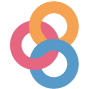)](https://mybinder.org/v2/gh/linogaliana/python-datascientist/master?filepath=/__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04a_webscraping_TP.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/manipulation/04a_webscraping_TP.ipynb)

Le [webscraping](https://fr.wikipedia.org/wiki/Web_scraping) désigne les techniques d'extraction du contenu des sites internet. C'est une pratique très utile pour toute personne souhaitant travailler sur des informations disponibles en ligne, mais n'existant pas forcément sous la forme d'un tableau *Excel*.

Ce TP vous présente comment créer et exécuter des robots afin de recupérer rapidement des informations utiles à vos projets actuels ou futurs.

Le *webscraping* a un certain nombre d'enjeux en termes de légalité, qui ne seront pas enseignés dans ce cours mais dans un cours de 3A à l'ENSAE. En particulier, la CNIL a publié en 2020 de nouvelles directives sur le *webscraping* reprécisant que toute donnée ne peut être réutilisée à l'insu de la personne à laquelle ces données appartiennent. 

Enfin, il est à noter que ce notebook est très fortement inspiré et réadapté à partir de [celui de Xavier Dupré](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx/notebooks/TD2A_Eco_Web_Scraping.html), l'ancien professeur de la matière.

# Un détour par le Web : comment fonctionne un site ?

Même si ce TP ne vise pas à faire un cours de web, il vous faut néanmoins certaines bases sur la manière dont un site internet fonctionne afin de comprendre comment sont structurées les informations sur une page.

Un site Web est un ensemble de pages codées en *HTML* qui permet de décrire à la fois le contenu et la forme d'une page *Web*.

Pour voir cela, ouvrez n'importe quelle page web et faites un clic-droit dessus. 
- Sous `Chrome` <i class="fab fa-chrome"></i> : Cliquez ensuite sur "Affichez le code source de la page" (<kbd>CTRL</kbd>+<kbd>U</kbd>) ;
- Sous `Firefox` <i class="fab fa-firefox"></i> : "Code source de la page" (<kbd>CTRL</kbd>+<kbd>MAJ</kbd>+<kbd>K</kbd>) ;
- Sous `Edge` <i class="fab fa-edge"></i> : "Affichez la page source" (<kbd>CTRL</kbd>+<kbd>U</kbd>) ;
- Sous `Safari` <i class="fab fa-safari"></i> : voir comment faire [ici](https://fr.wikihow.com/voir-le-code-source)

## Les balises

Sur une page web, vous trouverez toujours à coup sûr des éléments comme ``<head>``, ``<title>``, etc. Il  s'agit des codes qui vous permettent de structurer le contenu d'une page *HTML* et qui s'appellent des **balises**. 
Citons, par exemple, les balises ``<p>``, ``<h1>``, ``<h2>``, ``<h3>``, ``<strong>`` ou ``<em>``.
Le symbole ``< >`` est une balise : il sert à indiquer le début d'une partie. Le symbole ``</ >`` indique la fin de cette partie. La plupart des balises vont par paires, avec une *balise ouvrante* et une *balise fermante* (par exemple ``<p>`` et ``</p>``).

### Exemple : les balise des tableaux

| Balise      | Description                        |
|-------------|------------------------------------|
| `<table>`   | Tableau                            |
| `<caption>` | Titre du tableau                   |
| `<tr>`      | Ligne de tableau                   |
| `<th>`      | Cellule d'en-tête                  |
| `<td>`      | Cellule                            |
| `<thead>`   | Section de l'en-tête du tableau    |
| `<tbody>`   | Section du corps du tableau        |
| `<tfoot>`   | Section du pied du tableau         |

**Application : un tableau en HTML**

Le code *HTML* du tableau suivant

```{=html}
<table>
<caption> Le Titre de mon tableau </caption>

   <tr>
      <th>Prénom</th>
      <th>Nom</th>
      <th>Profession</th>
   </tr>
   <tr>
      <td>Mike </td>
      <td>Stuntman</td>
      <td>Cascadeur</td>
   </tr>
   <tr>
      <td>Mister</td>
      <td>Pink</td>
      <td>Gangster</td>
   </tr>
</table>
```

Donnera dans le navigateur :

<table>
<caption> Le Titre de mon tableau </caption>

   <tr>
      <th>Prénom</th>
      <th>Nom</th>
      <th>Profession</th>
   </tr>
   <tr>
      <td>Mike </td>
      <td>Stuntman</td>
      <td>Cascadeur</td>
   </tr>
   <tr>
      <td>Mister</td>
      <td>Pink</td>
      <td>Gangster</td>
   </tr>
</table>

### Parent et enfant

Dans le cadre du langage HTML, les termes de parent (*parent*) et enfant (*child*) servent à désigner des élements emboîtés les uns dans les autres. Dans la construction suivante, par exemple :

```{=html}
< div> 
    < p>
       bla,bla
    < /p>
< /div>
```

Sur la page web, cela apparaitra de la manière suivante : 

<div> 
    <p>
       bla,bla
    </p>
</div>

On dira que l'élément ``<div>`` est le parent de l'élément ``<p>`` tandis que l'élément ``<p>`` est l'enfant de l'élément ``<div>``.


:comment: *Mais pourquoi apprendre ça pour "scraper", me direz-vous ?*

Parce que, pour bien récupérer les informations d'un site internet, il faut pouvoir comprendre sa structure et donc son code HTML. Les fonctions python qui servent au scrapping sont principalement construites pour vous permettre de naviguer entre les balises.

# Scraper avec python: le package `BeautifulSoup`

## Les packages disponibles

Nous allons essentiellement utiliser le package [BeautifulSoup4](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) pour ce cours, mais d'autres packages existent (Selenium, Scrapy...). Il s'utilise souvent en conjonction avec
[urllib](https://docs.python.org/3/library/urllib.html#module-urllib)

`BeautifulSoup` sera suffisant quand vous voudrez travailler sur des pages HTML statiques. Dès que les informations que vous recherchez sont générées via l'exécution de scripts [Javascript](https://fr.wikipedia.org/wiki/JavaScript), il vous faudra passer par des outils comme [Selenium](https://selenium-python.readthedocs.io/).

De même, si vous ne connaissez pas l'URL, il faudra passer par un framework comme [Scrapy](https://scrapy.org/), qui passe facilement d'une page à une autre ("crawl"). Scrapy est plus complexe à manipuler que BeautifulSoup : si vous voulez plus de détails, rendez-vous sur la page du [tutoriel Scrapy](https://doc.scrapy.org/en/latest/intro/tutorial.html).

Le *webscraping* est un domaine où la reproductibilité est compliquée à mettre en oeuvre. Une page *web* évolue
potentiellement régulièrement et d'une page web à l'autre, la structure peut
être très différente ce qui rend certains codes difficilement exportables.
Par conséquent, la meilleure manière d'avoir un programme fonctionnel est
de comprendre la structure d'une page web et dissocier les éléments exportables
à d'autres cas d'usages des requêtes *ad hoc*. 




In [ ]:
import urllib
import bs4
import pandas
from urllib import request

## Récupérer le contenu d'une page HTML

On va commencer doucement. Prenons une page wikipedia, par exemple celle de la Ligue 1 de football : [Championnat de France de football 2019-2020](https://fr.wikipedia.org/wiki/Championnat_de_France_de_football_2019-2020). On va souhaiter récupérer la liste des équipes, ainsi que les url des pages Wikipedia de ces équipes.


In [ ]:
# Etape 1 : se connecter à la page wikipedia et obtenir le code source

url_ligue_1 = "https://fr.wikipedia.org/wiki/Championnat_de_France_de_football_2019-2020"
    
request_text = request.urlopen(url_ligue_1).read()
# print(request_text[:1000])    

In [ ]:
type(request_text)

```
## <class 'bytes'>
```


In [ ]:
# Etape 2 : utiliser le package BeautifulSoup
# qui "comprend" les balises contenues dans la chaine de caractères renvoyée par la fonction request

page = bs4.BeautifulSoup(request_text, "lxml")

#print(page)

Si on print l'objet, page créée avec BeautifulSoup, on voit que ce n'est plus une chaine de caractères mais bien une page HTML avec des balises. On peut à présent chercher des élements à l'intérieur de ces balises.

## La méthode `find`

Par exemple, si on veut connaître le titre de la page, on utilise la méthode ``.find`` et on lui demande *"title"*


In [ ]:
print(page.find("title"))

```
## <title>Championnat de France de football 2019-2020 — Wikipédia</title>
```

La methode ``.find`` ne renvoie que la première occurence de l'élément. 

Pour vous en assurer vous pouvez :
- copier le bout de code source obtenu, 
- le coller  dans une cellule de votre notebook
- et passer la cellule en "Markdown"

La cellule avec le copier-coller du code source donne : 


In [ ]:
print(page.find("table"))

```
## <table><caption style="background:#99cc99;color:#000000;">Généralités</caption><tbody><tr>
## <th scope="row" style="width:10.5em;">Sport</th>
## <td>
## <a href="/wiki/Football" title="Football">Football</a></td>
## </tr>
## <tr>
## <th scope="row" style="width:10.5em;">Organisateur(s)</th>
## <td>
## <a href="/wiki/Ligue_de_football_professionnel" title="Ligue de football professionnel">LFP</a></td>
## </tr>
## <tr>
## <th scope="row" style="width:10.5em;">Édition</th>
## <td>
## <abbr class="abbr" title="Quatre-vingt-deuxième (huitante-deuxième / octante-deuxième)">82<sup>e</sup></abbr></td>
## </tr>
## <tr>
## <th scope="row" style="width:10.5em;">Lieu(x)</th>
## <td>
## <span class="datasortkey" data-sort-value="France"><span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau de la France"><img alt="Drapeau de la France" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a> </span><a href="/wiki/France" title="France">France</a></span> et <br/><span class="datasortkey" data-sort-value="Monaco"><span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_Monaco.svg" title="Drapeau de Monaco"><img alt="Drapeau de Monaco" class="noviewer thumbborder" data-file-height="800" data-file-width="1000" decoding="async" height="16" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Flag_of_Monaco.svg/20px-Flag_of_Monaco.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Flag_of_Monaco.svg/30px-Flag_of_Monaco.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Flag_of_Monaco.svg/40px-Flag_of_Monaco.svg.png 2x" width="20"/></a> </span><a href="/wiki/Monaco" title="Monaco">Monaco</a></span></td>
## </tr>
## <tr>
## <th scope="row" style="width:10.5em;">Date</th>
## <td>
## Du <time class="nowrap date-lien" data-sort-value="2019-08-09" datetime="2019-08-09"><a href="/wiki/9_ao%C3%BBt_en_sport" title="9 août en sport">9</a> <a class="mw-redirect" href="/wiki/Ao%C3%BBt_2019_en_sport" title="Août 2019 en sport">août</a> <a href="/wiki/2019_en_football" title="2019 en football">2019</a></time><br/>au <time class="nowrap date-lien" data-sort-value="2020-03-08" datetime="2020-03-08"><a href="/wiki/8_mars_en_sport" title="8 mars en sport">8 mars</a> <a href="/wiki/2020_en_football" title="2020 en football">2020</a></time> <small>(arrêt définitif)</small></td>
## </tr>
## <tr>
## <th scope="row" style="width:10.5em;">Participants</th>
## <td>
## 20 équipes</td>
## </tr>
## <tr>
## <th scope="row" style="width:10.5em;">Matchs joués</th>
## <td>
## 279 (sur 380 prévus)</td>
## </tr>
## <tr>
## <th scope="row" style="width:10.5em;">Site web officiel</th>
## <td>
## <a class="external text" href="https://www.ligue1.fr/" rel="nofollow">Site officiel</a></td>
## </tr></tbody></table>
```

ce qui est le texte source permettant de générer le tableau suivant:


In [ ]:
page.find("table")

<table><caption style="background:#99cc99;color:#000000;">Généralités</caption><tbody><tr>
<th scope="row" style="width:10.5em;">Sport</th>
<td>
<a href="/wiki/Football" title="Football">Football</a></td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Organisateur(s)</th>
<td>
<a href="/wiki/Ligue_de_football_professionnel" title="Ligue de football professionnel">LFP</a></td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Édition</th>
<td>
<abbr class="abbr" title="Quatre-vingt-deuxième (huitante-deuxième / octante-deuxième)">82<sup>e</sup></abbr></td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Lieu(x)</th>
<td>
<span class="datasortkey" data-sort-value="France"><span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau de la France"><img alt="Drapeau de la France" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a> </span><a href="/wiki/France" title="France">France</a></span> et <br/><span class="datasortkey" data-sort-value="Monaco"><span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_Monaco.svg" title="Drapeau de Monaco"><img alt="Drapeau de Monaco" class="noviewer thumbborder" data-file-height="800" data-file-width="1000" decoding="async" height="16" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Flag_of_Monaco.svg/20px-Flag_of_Monaco.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Flag_of_Monaco.svg/30px-Flag_of_Monaco.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Flag_of_Monaco.svg/40px-Flag_of_Monaco.svg.png 2x" width="20"/></a> </span><a href="/wiki/Monaco" title="Monaco">Monaco</a></span></td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Date</th>
<td>
Du <time class="nowrap date-lien" data-sort-value="2019-08-09" datetime="2019-08-09"><a href="/wiki/9_ao%C3%BBt_en_sport" title="9 août en sport">9</a> <a class="mw-redirect" href="/wiki/Ao%C3%BBt_2019_en_sport" title="Août 2019 en sport">août</a> <a href="/wiki/2019_en_football" title="2019 en football">2019</a></time><br/>au <time class="nowrap date-lien" data-sort-value="2020-03-08" datetime="2020-03-08"><a href="/wiki/8_mars_en_sport" title="8 mars en sport">8 mars</a> <a href="/wiki/2020_en_football" title="2020 en football">2020</a></time> <small>(arrêt définitif)</small></td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Participants</th>
<td>
20 équipes</td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Matchs joués</th>
<td>
279 (sur 380 prévus)</td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Site web officiel</th>
<td>
<a class="external text" href="https://www.ligue1.fr/" rel="nofollow">Site officiel</a></td>
</tr></tbody></table>

## La méthode `findAll`

Pour trouver toutes les occurences, on utilise ``.findAll()``.


In [ ]:
print("Il y a", len(page.findAll("table")), "éléments dans la page qui sont des <table>")

```
## Il y a 34 éléments dans la page qui sont des <table>
```

# Exercice guidé : obtenir la liste des équipes de Ligue 1

Dans le premier paragraphe de la page "Participants", on a le tableau avec les résultats de l'année. 

Le but est de récupérer les informations contenues dans ce tableau. 

Pour cela, nous allons procéder en 6 étapes:

1. Trouver le tableau
2. Récupérer chaque ligne du table
3. Nettoyer les sorties en ne gardant que le texte sur une ligne
4. Généraliser sur toutes les lignes
5. Récupérer les entêtes du tableau
6. Finalisation du tableau

:one:
Trouver le tableau


In [ ]:
# on identifie le tableau en question : c'est le premier qui a cette classe "wikitable sortable"
tableau_participants = page.find('table', {'class' : 'wikitable sortable'})
tableau_participants

<table class="wikitable sortable" style="font-size:90%;line-height:15px;text-align:center">
<tbody><tr>
<th scope="col">Club
</th>
<th scope="col">Dernière<br/>montée
</th>
<th scope="col">Budget<sup class="reference" id="cite_ref-3"><a href="#cite_note-3"><span class="cite_crochet">[</span>3<span class="cite_crochet">]</span></a></sup><br/>en M<a href="/wiki/Euro" title="Euro">€</a>
</th>
<th scope="col">Classement<br/><a href="/wiki/Championnat_de_France_de_football_2018-2019" title="Championnat de France de football 2018-2019">2018-2019</a>
</th>
<th scope="col">Entraîneur
</th>
<th scope="col">Depuis
</th>
<th scope="col">Stade
</th>
<th scope="col">Capacité<br/>en L1<sup class="reference" id="cite_ref-4"><a href="#cite_note-4"><span class="cite_crochet">[</span>4<span class="cite_crochet">]</span></a></sup>
</th>
<th scope="col">Nombre<br/>de saisons<br/>en L1
</th></tr>
<tr bgcolor="#97DEFF">
<td><a href="/wiki/Paris_Saint-Germain_Football_Club" title="Paris Saint-Germain Football Club">Paris Saint-Germain</a>
</td>
<td>1974
</td>
<td>637
</td>
<td><span data-sort-value="101 !"></span><abbr class="abbr" title="Premier">1<sup>er</sup></abbr>
</td>
<td align="left"><span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_Germany.svg" title="Drapeau : Allemagne"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="1000" decoding="async" height="12" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Flag_of_Germany.svg/20px-Flag_of_Germany.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Flag_of_Germany.svg/30px-Flag_of_Germany.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Flag_of_Germany.svg/40px-Flag_of_Germany.svg.png 2x" width="20"/></a></span> <a href="/wiki/Thomas_Tuchel" title="Thomas Tuchel">Thomas Tuchel</a>
</td>
<td>2018
</td>
<td><a href="/wiki/Parc_des_Princes" title="Parc des Princes">Parc des Princes</a>
</td>
<td>47 929
</td>
<td>46
</td></tr>
<tr bgcolor="#97DEFF">
<td><a href="/wiki/LOSC_Lille" title="LOSC Lille">LOSC Lille</a>
</td>
<td>2000
</td>
<td>120
</td>
<td><span data-sort-value="102 !"></span><abbr class="abbr" title="Deuxième">2<sup>e</sup></abbr>
</td>
<td align="left"><span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span> <a href="/wiki/Christophe_Galtier" title="Christophe Galtier">Christophe Galtier</a>
</td>
<td>2017
</td>
<td><a href="/wiki/Stade_Pierre-Mauroy" title="Stade Pierre-Mauroy">Stade Pierre-Mauroy</a>
</td>
<td>49 712
</td>
<td>59
</td></tr>
<tr bgcolor="#97DEFF">
<td><a href="/wiki/Olympique_lyonnais" title="Olympique lyonnais">Olympique lyonnais</a>
</td>
<td>1989
</td>
<td>310
</td>
<td><span data-sort-value="103 !"></span><abbr class="abbr" title="Troisième">3<sup>e</sup></abbr>
</td>
<td align="left"><span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span> <a href="/wiki/Rudi_Garcia" title="Rudi Garcia">Rudi Garcia</a>
</td>
<td>2019
</td>
<td><a href="/wiki/Parc_Olympique_lyonnais" title="Parc Olympique lyonnais">Groupama Stadium</a>
</td>
<td>57 206
</td>
<td>60
</td></tr>
<tr bgcolor="#FFE052">
<td><a href="/wiki/Association_sportive_de_Saint-%C3%89tienne" title="Association sportive de Saint-Étienne">AS Saint-Étienne</a>
</td>
<td>2004
</td>
<td>100
</td>
<td><span data-sort-value="104 !"></span><abbr class="abbr" title="Quatrième">4<sup>e</sup></abbr>
</td>
<td align="left"><span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span> <a href="/wiki/Claude_Puel" title="Claude Puel">Claude Puel</a>
</td>
<td>2019
</td>
<td><a href="/wiki/Stade_Geoffroy-Guichard" title="Stade Geoffroy-Guichard">Stade Geoffroy-Guichard</a>
</td>
<td>41 965
</td>
<td>66
</td></tr>
<tr>
<td><a href="/wiki/Olympique_de_Marseille" title="Olympique de Marseille">Olympique de Marseille</a>
</td>
<td>1996
</td>
<td>110
</td>
<td><span data-sort-value="105 !"></span><abbr class="abbr" title="Cinquième">5<sup>e</sup></abbr>
</td>
<td align="left"><span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_Portugal.svg" title="Drapeau : Portugal"><img alt="" class="noviewer thumbborder" data-file-height="400" data-file-width="600" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Portugal.svg/20px-Flag_of_Portugal.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Portugal.svg/30px-Flag_of_Portugal.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Portugal.svg/40px-Flag_of_Portugal.svg.png 2x" width="20"/></a></span> <a href="/wiki/Andr%C3%A9_Villas-Boas" title="André Villas-Boas">André Villas-Boas</a>
</td>
<td>2019
</td>
<td><a href="/wiki/Stade_V%C3%A9lodrome" title="Stade Vélodrome">Orange Vélodrome</a>
</td>
<td>66 226
</td>
<td>69
</td></tr>
<tr>
<td><a href="/wiki/Montpellier_H%C3%A9rault_Sport_Club" title="Montpellier Hérault Sport Club">Montpellier HSC</a>
</td>
<td>2009
</td>
<td>40
</td>
<td><span data-sort-value="106 !"></span><abbr class="abbr" title="Sixième">6<sup>e</sup></abbr>
</td>
<td align="left"><span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_Armenia.svg" title="Drapeau : Arménie"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="1200" decoding="async" height="10" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Flag_of_Armenia.svg/20px-Flag_of_Armenia.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Flag_of_Armenia.svg/30px-Flag_of_Armenia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Flag_of_Armenia.svg/40px-Flag_of_Armenia.svg.png 2x" width="20"/></a></span><span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span> <a href="/wiki/Michel_Der_Zakarian" title="Michel Der Zakarian">Michel Der Zakarian</a>
</td>
<td>2017
</td>
<td><a href="/wiki/Stade_de_la_Mosson" title="Stade de la Mosson">Stade de la Mosson</a>
</td>
<td>22 000
</td>
<td>27
</td></tr>
<tr>
<td><a href="/wiki/Olympique_Gymnaste_Club_Nice" title="Olympique Gymnaste Club Nice">OGC Nice</a>
</td>
<td>2002
</td>
<td>50
</td>
<td><span data-sort-value="107 !"></span><abbr class="abbr" title="Septième">7<sup>e</sup></abbr>
</td>
<td align="left"><span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span> <a href="/wiki/Patrick_Vieira" title="Patrick Vieira">Patrick Vieira</a>
</td>
<td>2018
</td>
<td><a href="/wiki/Allianz_Riviera" title="Allianz Riviera">Allianz Riviera</a>
</td>
<td>35 596
</td>
<td>60
</td></tr>
<tr>
<td><a href="/wiki/Stade_de_Reims" title="Stade de Reims">Stade de Reims</a>
</td>
<td>2018
</td>
<td>45
</td>
<td><span data-sort-value="108 !"></span><abbr class="abbr" title="Huitième">8<sup>e</sup></abbr>
</td>
<td align="left"><span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span> <a href="/wiki/David_Guion" title="David Guion">David Guion</a>
</td>
<td>2017
</td>
<td><a href="/wiki/Stade_Auguste-Delaune" title="Stade Auguste-Delaune">Stade Auguste-Delaune</a>
</td>
<td>20 546
</td>
<td>35
</td></tr>
<tr>
<td><a href="/wiki/N%C3%AEmes_Olympique" title="Nîmes Olympique">Nîmes Olympique</a>
</td>
<td>2018
</td>
<td>27
</td>
<td><span data-sort-value="109 !"></span><abbr class="abbr" title="Neuvième">9<sup>e</sup></abbr>
</td>
<td align="left"><span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span> <a href="/wiki/Bernard_Blaquart" title="Bernard Blaquart">Bernard Blaquart</a>
</td>
<td>2015
</td>
<td><a href="/wiki/Stade_des_Costi%C3%A8res" title="Stade des Costières">Stade des Costières</a>
</td>
<td>15 788
</td>
<td>35
</td></tr>
<tr bgcolor="#FFE052">
<td><a class="mw-redirect" href="/wiki/Stade_rennais_football_club" title="Stade rennais football club">Stade rennais FC</a>
</td>
<td>1994
</td>
<td>65
</td>
<td><span data-sort-value="110 !"></span><abbr class="abbr" title="Dixième">10<sup>e</sup></abbr>
</td>
<td align="left"><span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span> <a href="/wiki/Julien_St%C3%A9phan" title="Julien Stéphan">Julien Stéphan</a>
</td>
<td>2018
</td>
<td><a href="/wiki/Roazhon_Park" title="Roazhon Park">Roazhon Park</a>
</td>
<td>29 194
</td>
<td>62
</td></tr>
<tr bgcolor="#FFF052">
<td><a href="/wiki/Racing_Club_de_Strasbourg_Alsace" title="Racing Club de Strasbourg Alsace">RC Strasbourg Alsace</a>
</td>
<td>2017
</td>
<td>43
</td>
<td><span data-sort-value="111 !"></span><abbr class="abbr" title="Onzième">11<sup>e</sup></abbr>
</td>
<td align="left"><span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span> <a href="/wiki/Thierry_Laurey" title="Thierry Laurey">Thierry Laurey</a>
</td>
<td>2016
</td>
<td><a href="/wiki/Stade_de_la_Meinau" title="Stade de la Meinau">Stade de la Meinau</a>
</td>
<td>26 109
</td>
<td>58
</td></tr>
<tr>
<td><a href="/wiki/Football_Club_de_Nantes" title="Football Club de Nantes">FC Nantes</a>
</td>
<td>2013
</td>
<td>70
</td>
<td><span data-sort-value="112 !"></span><abbr class="abbr" title="Douzième">12<sup>e</sup></abbr>
</td>
<td align="left"><span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span> <a href="/wiki/Christian_Gourcuff" title="Christian Gourcuff">Christian Gourcuff</a>
</td>
<td>2019
</td>
<td><a href="/wiki/Stade_de_la_Beaujoire" title="Stade de la Beaujoire">Stade de la Beaujoire - Louis Fonteneau</a>
</td>
<td>35 322
</td>
<td>51
</td></tr>
<tr>
<td><a class="mw-redirect" href="/wiki/Angers_sporting_club_de_l%27Ouest" title="Angers sporting club de l'Ouest">SCO d’Angers</a>
</td>
<td>2015
</td>
<td>32
</td>
<td><span data-sort-value="113 !"></span><abbr class="abbr" title="Treizième">13<sup>e</sup></abbr>
</td>
<td align="left"><span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span> <a href="/wiki/St%C3%A9phane_Moulin_(football)" title="Stéphane Moulin (football)">Stéphane Moulin</a>
</td>
<td>2011
</td>
<td><a href="/wiki/Stade_Raymond-Kopa" title="Stade Raymond-Kopa">Stade Raymond-Kopa</a>
</td>
<td>17 048
</td>
<td>27
</td></tr>
<tr>
<td><a href="/wiki/Football_Club_des_Girondins_de_Bordeaux" title="Football Club des Girondins de Bordeaux">Girondins de Bordeaux</a>
</td>
<td>1992
</td>
<td>70
</td>
<td><span data-sort-value="114 !"></span><abbr class="abbr" title="Quatorzième">14<sup>e</sup></abbr>
</td>
<td align="left"><span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_Portugal.svg" title="Drapeau : Portugal"><img alt="" class="noviewer thumbborder" data-file-height="400" data-file-width="600" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Portugal.svg/20px-Flag_of_Portugal.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Portugal.svg/30px-Flag_of_Portugal.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Portugal.svg/40px-Flag_of_Portugal.svg.png 2x" width="20"/></a></span> <a href="/wiki/Paulo_Sousa_(football,_1970)" title="Paulo Sousa (football, 1970)">Paulo Sousa</a>
</td>
<td>2019
</td>
<td><a href="/wiki/Matmut_Atlantique" title="Matmut Atlantique">Matmut Atlantique</a>
</td>
<td>42 115
</td>
<td>66
</td></tr>
<tr>
<td><a href="/wiki/Amiens_Sporting_Club" title="Amiens Sporting Club">Amiens SC</a>
</td>
<td>2017
</td>
<td>30
</td>
<td><span data-sort-value="115 !"></span><abbr class="abbr" title="Quinzième">15<sup>e</sup></abbr>
</td>
<td align="left"><span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_Slovenia.svg" title="Drapeau : Slovénie"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="1200" decoding="async" height="10" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/f0/Flag_of_Slovenia.svg/20px-Flag_of_Slovenia.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/f0/Flag_of_Slovenia.svg/30px-Flag_of_Slovenia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/f0/Flag_of_Slovenia.svg/40px-Flag_of_Slovenia.svg.png 2x" width="20"/></a></span> <a href="/wiki/Luka_Elsner" title="Luka Elsner">Luka Elsner</a>
</td>
<td>2019
</td>
<td><a href="/wiki/Stade_de_la_Licorne" title="Stade de la Licorne">Stade Crédit Agricole la Licorne</a>
</td>
<td>12 999
</td>
<td>2
</td></tr>
<tr>
<td><a href="/wiki/Toulouse_Football_Club" title="Toulouse Football Club">Toulouse FC</a>
</td>
<td>2003
</td>
<td>35
</td>
<td><span data-sort-value="116 !"></span><abbr class="abbr" title="Seizième">16<sup>e</sup></abbr>
</td>
<td align="left"><span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span> <a href="/wiki/Denis_Zanko" title="Denis Zanko">Denis Zanko</a>
</td>
<td>2020
</td>
<td><a href="/wiki/Stadium_de_Toulouse" title="Stadium de Toulouse">Stadium de Toulouse</a>
</td>
<td>33 033
</td>
<td>32
</td></tr>
<tr>
<td><a class="mw-redirect" href="/wiki/Association_sportive_de_Monaco_football_club" title="Association sportive de Monaco football club">AS Monaco</a>
</td>
<td>2013
</td>
<td>220
</td>
<td><span data-sort-value="117 !"></span><abbr class="abbr" title="Dix-septième">17<sup>e</sup></abbr>
</td>
<td align="left"><span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_Spain.svg" title="Drapeau : Espagne"><img alt="" class="noviewer thumbborder" data-file-height="500" data-file-width="750" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Spain.svg/20px-Flag_of_Spain.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Spain.svg/30px-Flag_of_Spain.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Spain.svg/40px-Flag_of_Spain.svg.png 2x" width="20"/></a></span> <a href="/wiki/Robert_Moreno" title="Robert Moreno">Robert Moreno</a>
</td>
<td>2019
</td>
<td><a href="/wiki/Stade_Louis-II" title="Stade Louis-II">Stade Louis-II</a>
</td>
<td>16 500
</td>
<td>60
</td></tr>
<tr>
<td><a href="/wiki/Dijon_Football_C%C3%B4te-d%27Or" title="Dijon Football Côte-d'Or">Dijon FCO</a>
</td>
<td>2016
</td>
<td>38
</td>
<td><span data-sort-value="118 !"></span><abbr class="abbr" title="Dix-huitième">18<sup>e</sup></abbr>
</td>
<td align="left"><span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span> <a href="/wiki/St%C3%A9phane_Jobard" title="Stéphane Jobard">Stéphane Jobard</a>
</td>
<td>2019
</td>
<td><a href="/wiki/Stade_Gaston-G%C3%A9rard" title="Stade Gaston-Gérard">Parc des Sports Gaston-Gérard</a>
</td>
<td>15 459
</td>
<td>4
</td></tr>
<tr bgcolor="#a8fca8">
<td><a href="/wiki/Football_Club_de_Metz" title="Football Club de Metz">FC Metz</a>
</td>
<td>2019
</td>
<td>40
</td>
<td><span data-sort-value="201 !"></span><abbr class="abbr" title="Premier">1<sup>er</sup></abbr> (<a class="mw-redirect" href="/wiki/Championnat_de_France_de_football_de_Ligue_2_2018-2019" title="Championnat de France de football de Ligue 2 2018-2019">Ligue 2</a>)
</td>
<td align="left"><span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span> <a href="/wiki/Vincent_Hognon" title="Vincent Hognon">Vincent Hognon</a>
</td>
<td>2019
</td>
<td><a href="/wiki/Stade_Saint-Symphorien" title="Stade Saint-Symphorien">Stade Saint-Symphorien</a>
</td>
<td>25 865
</td>
<td>61
</td></tr>
<tr bgcolor="#a8fca8">
<td><a href="/wiki/Stade_brestois_29" title="Stade brestois 29">Stade brestois 29</a>
</td>
<td>2019
</td>
<td>30
</td>
<td><span data-sort-value="202 !"></span><abbr class="abbr" title="Deuxième">2<sup>e</sup></abbr> (<a class="mw-redirect" href="/wiki/Championnat_de_France_de_football_de_Ligue_2_2018-2019" title="Championnat de France de football de Ligue 2 2018-2019">Ligue 2</a>)
</td>
<td align="left"><span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span> <a href="/wiki/Olivier_Dall%27Oglio" title="Olivier Dall'Oglio">Olivier Dall'Oglio</a>
</td>
<td>2019
</td>
<td><a href="/wiki/Stade_Francis-Le_Bl%C3%A9" title="Stade Francis-Le Blé">Stade Francis-Le Blé</a>
</td>
<td>14 920
</td>
<td>13
</td></tr></tbody></table>

:two:
Récupérer chaque ligne du tableau


In [ ]:
table_body = tableau_participants.find('tbody')

# on recherche toutes les lignes du tableau avec la balise "tr"
rows = table_body.find_all('tr')

# on obtient une liste où chaque élément est une des lignes du tableau

# par exemple la première ligne va correspondre aux entêtes de colonne
print(rows[0])

```
## <tr>
## <th scope="col">Club
## </th>
## <th scope="col">Dernière<br/>montée
## </th>
## <th scope="col">Budget<sup class="reference" id="cite_ref-3"><a href="#cite_note-3"><span class="cite_crochet">[</span>3<span class="cite_crochet">]</span></a></sup><br/>en M<a href="/wiki/Euro" title="Euro">€</a>
## </th>
## <th scope="col">Classement<br/><a href="/wiki/Championnat_de_France_de_football_2018-2019" title="Championnat de France de football 2018-2019">2018-2019</a>
## </th>
## <th scope="col">Entraîneur
## </th>
## <th scope="col">Depuis
## </th>
## <th scope="col">Stade
## </th>
## <th scope="col">Capacité<br/>en L1<sup class="reference" id="cite_ref-4"><a href="#cite_note-4"><span class="cite_crochet">[</span>4<span class="cite_crochet">]</span></a></sup>
## </th>
## <th scope="col">Nombre<br/>de saisons<br/>en L1
## </th></tr>
```


In [ ]:
# par exemple la seconde ligne va correspondre à la ligne du premier club présent dans le tableau

print(rows[1])

```
## <tr bgcolor="#97DEFF">
## <td><a href="/wiki/Paris_Saint-Germain_Football_Club" title="Paris Saint-Germain Football Club">Paris Saint-Germain</a>
## </td>
## <td>1974
## </td>
## <td>637
## </td>
## <td><span data-sort-value="101 !"></span><abbr class="abbr" title="Premier">1<sup>er</sup></abbr>
## </td>
## <td align="left"><span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_Germany.svg" title="Drapeau : Allemagne"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="1000" decoding="async" height="12" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Flag_of_Germany.svg/20px-Flag_of_Germany.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Flag_of_Germany.svg/30px-Flag_of_Germany.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Flag_of_Germany.svg/40px-Flag_of_Germany.svg.png 2x" width="20"/></a></span> <a href="/wiki/Thomas_Tuchel" title="Thomas Tuchel">Thomas Tuchel</a>
## </td>
## <td>2018
## </td>
## <td><a href="/wiki/Parc_des_Princes" title="Parc des Princes">Parc des Princes</a>
## </td>
## <td>47 929
## </td>
## <td>46
## </td></tr>
```

:three:
Nettoyer les sorties en ne gardant que le texte sur une ligne

On va utiliser l'attribut `text` afin de se débarasser de toute la couche de HTML qu'on obtient à l'étape 2.

Un exemple sur la ligne du premier club :
- on commence par prendre toutes les cellules de cette ligne, avec la balise `td`.
- on fait ensuite une boucle sur chacune des cellules et on ne garde que le texte de la cellule avec l'attribut `text`.
- enfin, on applique la méthode `strip()` pour que le texte soit bien mis en forme (sans espace inutile etc).



In [ ]:
cols = rows[1].find_all('td')
print(cols[0])

```
## <td><a href="/wiki/Paris_Saint-Germain_Football_Club" title="Paris Saint-Germain Football Club">Paris Saint-Germain</a>
## </td>
```

In [ ]:
print(cols[0].text.strip())

```
## Paris Saint-Germain
```


In [ ]:
for ele in cols : 
    print(ele.text.strip())

```
## Paris Saint-Germain
## 1974
## 637
## 1er
## Thomas Tuchel
## 2018
## Parc des Princes
## 47 929
## 46
```

:four:
Généraliser sur toutes les lignes


In [ ]:
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    print(cols)

```
## []
## ['Paris Saint-Germain', '1974', '637', '1er', 'Thomas Tuchel', '2018', 'Parc des Princes', '47\xa0929', '46']
## ['LOSC Lille', '2000', '120', '2e', 'Christophe Galtier', '2017', 'Stade Pierre-Mauroy', '49\xa0712', '59']
## ['Olympique lyonnais', '1989', '310', '3e', 'Rudi Garcia', '2019', 'Groupama Stadium', '57\xa0206', '60']
## ['AS Saint-Étienne', '2004', '100', '4e', 'Claude Puel', '2019', 'Stade Geoffroy-Guichard', '41\xa0965', '66']
## ['Olympique de Marseille', '1996', '110', '5e', 'André Villas-Boas', '2019', 'Orange Vélodrome', '66\xa0226', '69']
## ['Montpellier HSC', '2009', '40', '6e', 'Michel Der Zakarian', '2017', 'Stade de la Mosson', '22\xa0000', '27']
## ['OGC Nice', '2002', '50', '7e', 'Patrick Vieira', '2018', 'Allianz Riviera', '35\xa0596', '60']
## ['Stade de Reims', '2018', '45', '8e', 'David Guion', '2017', 'Stade Auguste-Delaune', '20\xa0546', '35']
## ['Nîmes Olympique', '2018', '27', '9e', 'Bernard Blaquart', '2015', 'Stade des Costières', '15\xa0788', '35']
## ['Stade rennais FC', '1994', '65', '10e', 'Julien Stéphan', '2018', 'Roazhon Park', '29\xa0194', '62']
## ['RC Strasbourg Alsace', '2017', '43', '11e', 'Thierry Laurey', '2016', 'Stade de la Meinau', '26\xa0109', '58']
## ['FC Nantes', '2013', '70', '12e', 'Christian Gourcuff', '2019', 'Stade de la Beaujoire - Louis Fonteneau', '35\xa0322', '51']
## ['SCO d’Angers', '2015', '32', '13e', 'Stéphane Moulin', '2011', 'Stade Raymond-Kopa', '17\xa0048', '27']
## ['Girondins de Bordeaux', '1992', '70', '14e', 'Paulo Sousa', '2019', 'Matmut Atlantique', '42\xa0115', '66']
## ['Amiens SC', '2017', '30', '15e', 'Luka Elsner', '2019', 'Stade Crédit Agricole la Licorne', '12\xa0999', '2']
## ['Toulouse FC', '2003', '35', '16e', 'Denis Zanko', '2020', 'Stadium de Toulouse', '33\xa0033', '32']
## ['AS Monaco', '2013', '220', '17e', 'Robert Moreno', '2019', 'Stade Louis-II', '16\xa0500', '60']
## ['Dijon FCO', '2016', '38', '18e', 'Stéphane Jobard', '2019', 'Parc des Sports Gaston-Gérard', '15\xa0459', '4']
## ['FC Metz', '2019', '40', '1er (Ligue 2)', 'Vincent Hognon', '2019', 'Stade Saint-Symphorien', '25\xa0865', '61']
## ['Stade brestois 29', '2019', '30', '2e (Ligue 2)', "Olivier Dall'Oglio", '2019', 'Stade Francis-Le Blé', '14\xa0920', '13']
```

On a bien réussi à avoir les informations contenues dans le tableau des participants du championnat.
Mais la première ligne est étrange : c'est une liste vide ... 

Il s'agit des en-têtes : elles sont reconnues par la balise `th` et non `td`. 

On va mettre tout le contenu dans un dictionnaire, pour le transformer ensuite en DataFrame pandas : 


In [ ]:
dico_participants = dict()
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    if len(cols) > 0 : 
        dico_participants[cols[0]] = cols[1:]
dico_participants

```
## {'Paris Saint-Germain': ['1974', '637', '1er', 'Thomas Tuchel', '2018', 'Parc des Princes', '47\xa0929', '46'], 'LOSC Lille': ['2000', '120', '2e', 'Christophe Galtier', '2017', 'Stade Pierre-Mauroy', '49\xa0712', '59'], 'Olympique lyonnais': ['1989', '310', '3e', 'Rudi Garcia', '2019', 'Groupama Stadium', '57\xa0206', '60'], 'AS Saint-Étienne': ['2004', '100', '4e', 'Claude Puel', '2019', 'Stade Geoffroy-Guichard', '41\xa0965', '66'], 'Olympique de Marseille': ['1996', '110', '5e', 'André Villas-Boas', '2019', 'Orange Vélodrome', '66\xa0226', '69'], 'Montpellier HSC': ['2009', '40', '6e', 'Michel Der Zakarian', '2017', 'Stade de la Mosson', '22\xa0000', '27'], 'OGC Nice': ['2002', '50', '7e', 'Patrick Vieira', '2018', 'Allianz Riviera', '35\xa0596', '60'], 'Stade de Reims': ['2018', '45', '8e', 'David Guion', '2017', 'Stade Auguste-Delaune', '20\xa0546', '35'], 'Nîmes Olympique': ['2018', '27', '9e', 'Bernard Blaquart', '2015', 'Stade des Costières', '15\xa0788', '35'], 'Stade rennais FC': ['1994', '65', '10e', 'Julien Stéphan', '2018', 'Roazhon Park', '29\xa0194', '62'], 'RC Strasbourg Alsace': ['2017', '43', '11e', 'Thierry Laurey', '2016', 'Stade de la Meinau', '26\xa0109', '58'], 'FC Nantes': ['2013', '70', '12e', 'Christian Gourcuff', '2019', 'Stade de la Beaujoire - Louis Fonteneau', '35\xa0322', '51'], 'SCO d’Angers': ['2015', '32', '13e', 'Stéphane Moulin', '2011', 'Stade Raymond-Kopa', '17\xa0048', '27'], 'Girondins de Bordeaux': ['1992', '70', '14e', 'Paulo Sousa', '2019', 'Matmut Atlantique', '42\xa0115', '66'], 'Amiens SC': ['2017', '30', '15e', 'Luka Elsner', '2019', 'Stade Crédit Agricole la Licorne', '12\xa0999', '2'], 'Toulouse FC': ['2003', '35', '16e', 'Denis Zanko', '2020', 'Stadium de Toulouse', '33\xa0033', '32'], 'AS Monaco': ['2013', '220', '17e', 'Robert Moreno', '2019', 'Stade Louis-II', '16\xa0500', '60'], 'Dijon FCO': ['2016', '38', '18e', 'Stéphane Jobard', '2019', 'Parc des Sports Gaston-Gérard', '15\xa0459', '4'], 'FC Metz': ['2019', '40', '1er (Ligue 2)', 'Vincent Hognon', '2019', 'Stade Saint-Symphorien', '25\xa0865', '61'], 'Stade brestois 29': ['2019', '30', '2e (Ligue 2)', "Olivier Dall'Oglio", '2019', 'Stade Francis-Le Blé', '14\xa0920', '13']}
```


In [ ]:
data_participants = pandas.DataFrame.from_dict(dico_participants,orient='index')
data_participants.head()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>0</th>\n      <th>1</th>\n      <th>2</th>\n      <th>3</th>\n      <th>4</th>\n      <th>5</th>\n      <th>6</th>\n      <th>7</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>Paris Saint-Germain</th>\n      <td>1974</td>\n      <td>637</td>\n      <td>1er</td>\n      <td>Thomas Tuchel</td>\n      <td>2018</td>\n      <td>Parc des Princes</td>\n      <td>47\xa0929</td>\n      <td>46</td>\n    </tr>\n    <tr>\n      <th>LOSC Lille</th>\n      <td>2000</td>\n      <td>120</td>\n      <td>2e</td>\n      <td>Christophe Galtier</td>\n      <td>2017</td>\n      <td>Stade Pierre-Mauroy</td>\n      <td>49\xa0712</td>\n      <td>59</td>\n    </tr>\n    <tr>\n      <th>Olympique lyonnais</th>\n      <td>1989</td>\n      <td>310</td>\n      <td>3e</td>\n      <td>Rudi Garcia</td>\n      <td>2019</td>\n      <td>Groupama Stadium</td>\n      <td>57\xa0206</td>\n      <td>60</td>\n    </tr>\n    <tr>\n      <th>AS Saint-Étienne</th>\n      <td>2004</td>\n      <td>100</td>\n      <td>4e</td>\n      <td>Claude Puel</td>\n      <td>2019</td>\n      <td>Stade Geoffroy-Guichard</td>\n      <td>41\xa0965</td>\n      <td>66</td>\n    </tr>\n    <tr>\n      <th>Olympique de Marseille</th>\n      <td>1996</td>\n      <td>110</td>\n      <td>5e</td>\n      <td>André Villas-Boas</td>\n      <td>2019</td>\n      <td>Orange Vélodrome</td>\n      <td>66\xa0226</td>\n      <td>69</td>\n    </tr>\n    <tr>\n      <th>Montpellier HSC</th>\n      <td>2009</td>\n      <td>40</td>\n      <td>6e</td>\n      <td>Michel Der Zakarian</td>\n      <td>2017</td>\n      <td>Stade de la Mosson</td>\n      <td>22\xa0000</td>\n      <td>27</td>\n    </tr>\n    <tr>\n      <th>OGC Nice</th>\n      <td>2002</td>\n      <td>50</td>\n      <td>7e</td>\n      <td>Patrick Vieira</td>\n      <td>2018</td>\n      <td>Allianz Riviera</td>\n      <td>35\xa0596</td>\n      <td>60</td>\n    </tr>\n    <tr>\n      <th>Stade de Reims</th>\n      <td>2018</td>\n      <td>45</td>\n      <td>8e</td>\n      <td>David Guion</td>\n      <td>2017</td>\n      <td>Stade Auguste-Delaune</td>\n      <td>20\xa0546</td>\n      <td>35</td>\n    </tr>\n    <tr>\n      <th>Nîmes Olympique</th>\n      <td>2018</td>\n      <td>27</td>\n      <td>9e</td>\n      <td>Bernard Blaquart</td>\n      <td>2015</td>\n      <td>Stade des Costières</td>\n      <td>15\xa0788</td>\n      <td>35</td>\n    </tr>\n    <tr>\n      <th>Stade rennais FC</th>\n      <td>1994</td>\n      <td>65</td>\n      <td>10e</td>\n      <td>Julien Stéphan</td>\n      <td>2018</td>\n      <td>Roazhon Park</td>\n      <td>29\xa0194</td>\n      <td>62</td>\n    </tr>\n    <tr>\n      <th>RC Strasbourg Alsace</th>\n      <td>2017</td>\n      <td>43</td>\n      <td>11e</td>\n      <td>Thierry Laurey</td>\n      <td>2016</td>\n      <td>Stade de la Meinau</td>\n      <td>26\xa0109</td>\n      <td>58</td>\n    </tr>\n    <tr>\n      <th>FC Nantes</th>\n      <td>2013</td>\n      <td>70</td>\n      <td>12e</td>\n      <td>Christian Gourcuff</td>\n      <td>2019</td>\n      <td>Stade de la Beaujoire - Louis Fonteneau</td>\n      <td>35\xa0322</td>\n      <td>51</td>\n    </tr>\n    <tr>\n      <th>SCO d’Angers</th>\n      <td>2015</td>\n      <td>32</td>\n      <td>13e</td>\n      <td>Stéphane Moulin</td>\n      <td>2011</td>\n      <td>Stade Raymond-Kopa</td>\n      <td>17\xa0048</td>\n      <td>27</td>\n    </tr>\n    <tr>\n      <th>Girondins de Bordeaux</th>\n      <td>1992</td>\n      <td>70</td>\n      <td>14e</td>\n      <td>Paulo Sousa</td>\n      <td>2019</td>\n      <td>Matmut Atlantique</td>\n      <td>42\xa0115</td>\n      <td>66</td>\n    </tr>\n    <tr>\n      <th>Amiens SC</th>\n      <td>2017</td>\n      <td>30</td>\n      <td>15e</td>\n      <td>Luka Elsner</td>\n      <td>2019</td>\n      <td>Stade Crédit Agricole la Licorne</td>\n      <td>12\xa0999</td>\n      <td>2</td>\n    </tr>\n    <tr>\n      <th>Toulouse FC</th>\n      <td>2003</td>\n      <td>35</td>\n      <td>16e</td>\n      <td>Denis Zanko</td>\n      <td>2020</td>\n      <td>Stadium de Toulouse</td>\n      <td>33\xa0033</td>\n      <td>32</td>\n    </tr>\n    <tr>\n      <th>AS Monaco</th>\n      <td>2013</td>\n      <td>220</td>\n      <td>17e</td>\n      <td>Robert Moreno</td>\n      <td>2019</td>\n      <td>Stade Louis-II</td>\n      <td>16\xa0500</td>\n      <td>60</td>\n    </tr>\n    <tr>\n      <th>Dijon FCO</th>\n      <td>2016</td>\n      <td>38</td>\n      <td>18e</td>\n      <td>Stéphane Jobard</td>\n      <td>2019</td>\n      <td>Parc des Sports Gaston-Gérard</td>\n      <td>15\xa0459</td>\n      <td>4</td>\n    </tr>\n    <tr>\n      <th>FC Metz</th>\n      <td>2019</td>\n      <td>40</td>\n      <td>1er (Ligue 2)</td>\n      <td>Vincent Hognon</td>\n      <td>2019</td>\n      <td>Stade Saint-Symphorien</td>\n      <td>25\xa0865</td>\n      <td>61</td>\n    </tr>\n    <tr>\n      <th>Stade brestois 29</th>\n      <td>2019</td>\n      <td>30</td>\n      <td>2e (Ligue 2)</td>\n      <td>Olivier Dall\'Oglio</td>\n      <td>2019</td>\n      <td>Stade Francis-Le Blé</td>\n      <td>14\xa0920</td>\n      <td>13</td>\n    </tr>\n  </tbody>\n</table>'

:five:
Récupérer les entêtes du tableau


In [ ]:
for row in rows:
    cols = row.find_all('th')
    print(cols)
    if len(cols) > 0 : 
        cols = [ele.get_text(separator=' ').strip().title() for ele in cols]
        columns_participants = cols

```
## [<th scope="col">Club
## </th>, <th scope="col">Dernière<br/>montée
## </th>, <th scope="col">Budget<sup class="reference" id="cite_ref-3"><a href="#cite_note-3"><span class="cite_crochet">[</span>3<span class="cite_crochet">]</span></a></sup><br/>en M<a href="/wiki/Euro" title="Euro">€</a>
## </th>, <th scope="col">Classement<br/><a href="/wiki/Championnat_de_France_de_football_2018-2019" title="Championnat de France de football 2018-2019">2018-2019</a>
## </th>, <th scope="col">Entraîneur
## </th>, <th scope="col">Depuis
## </th>, <th scope="col">Stade
## </th>, <th scope="col">Capacité<br/>en L1<sup class="reference" id="cite_ref-4"><a href="#cite_note-4"><span class="cite_crochet">[</span>4<span class="cite_crochet">]</span></a></sup>
## </th>, <th scope="col">Nombre<br/>de saisons<br/>en L1
## </th>]
## []
## []
## []
## []
## []
## []
## []
## []
## []
## []
## []
## []
## []
## []
## []
## []
## []
## []
## []
## []
```


In [ ]:
columns_participants

```
## ['Club', 'Dernière Montée', 'Budget [ 3 ] En M €', 'Classement 2018-2019', 'Entraîneur', 'Depuis', 'Stade', 'Capacité En L1 [ 4 ]', 'Nombre De Saisons En L1']
```


:six: Finalisation du tableau 


In [ ]:
data_participants.columns = columns_participants[1:]

In [ ]:
data_participants.head()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Dernière Montée</th>\n      <th>Budget [ 3 ] En M €</th>\n      <th>Classement 2018-2019</th>\n      <th>Entraîneur</th>\n      <th>Depuis</th>\n      <th>Stade</th>\n      <th>Capacité En L1 [ 4 ]</th>\n      <th>Nombre De Saisons En L1</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>Paris Saint-Germain</th>\n      <td>1974</td>\n      <td>637</td>\n      <td>1er</td>\n      <td>Thomas Tuchel</td>\n      <td>2018</td>\n      <td>Parc des Princes</td>\n      <td>47\xa0929</td>\n      <td>46</td>\n    </tr>\n    <tr>\n      <th>LOSC Lille</th>\n      <td>2000</td>\n      <td>120</td>\n      <td>2e</td>\n      <td>Christophe Galtier</td>\n      <td>2017</td>\n      <td>Stade Pierre-Mauroy</td>\n      <td>49\xa0712</td>\n      <td>59</td>\n    </tr>\n    <tr>\n      <th>Olympique lyonnais</th>\n      <td>1989</td>\n      <td>310</td>\n      <td>3e</td>\n      <td>Rudi Garcia</td>\n      <td>2019</td>\n      <td>Groupama Stadium</td>\n      <td>57\xa0206</td>\n      <td>60</td>\n    </tr>\n    <tr>\n      <th>AS Saint-Étienne</th>\n      <td>2004</td>\n      <td>100</td>\n      <td>4e</td>\n      <td>Claude Puel</td>\n      <td>2019</td>\n      <td>Stade Geoffroy-Guichard</td>\n      <td>41\xa0965</td>\n      <td>66</td>\n    </tr>\n    <tr>\n      <th>Olympique de Marseille</th>\n      <td>1996</td>\n      <td>110</td>\n      <td>5e</td>\n      <td>André Villas-Boas</td>\n      <td>2019</td>\n      <td>Orange Vélodrome</td>\n      <td>66\xa0226</td>\n      <td>69</td>\n    </tr>\n    <tr>\n      <th>Montpellier HSC</th>\n      <td>2009</td>\n      <td>40</td>\n      <td>6e</td>\n      <td>Michel Der Zakarian</td>\n      <td>2017</td>\n      <td>Stade de la Mosson</td>\n      <td>22\xa0000</td>\n      <td>27</td>\n    </tr>\n    <tr>\n      <th>OGC Nice</th>\n      <td>2002</td>\n      <td>50</td>\n      <td>7e</td>\n      <td>Patrick Vieira</td>\n      <td>2018</td>\n      <td>Allianz Riviera</td>\n      <td>35\xa0596</td>\n      <td>60</td>\n    </tr>\n    <tr>\n      <th>Stade de Reims</th>\n      <td>2018</td>\n      <td>45</td>\n      <td>8e</td>\n      <td>David Guion</td>\n      <td>2017</td>\n      <td>Stade Auguste-Delaune</td>\n      <td>20\xa0546</td>\n      <td>35</td>\n    </tr>\n    <tr>\n      <th>Nîmes Olympique</th>\n      <td>2018</td>\n      <td>27</td>\n      <td>9e</td>\n      <td>Bernard Blaquart</td>\n      <td>2015</td>\n      <td>Stade des Costières</td>\n      <td>15\xa0788</td>\n      <td>35</td>\n    </tr>\n    <tr>\n      <th>Stade rennais FC</th>\n      <td>1994</td>\n      <td>65</td>\n      <td>10e</td>\n      <td>Julien Stéphan</td>\n      <td>2018</td>\n      <td>Roazhon Park</td>\n      <td>29\xa0194</td>\n      <td>62</td>\n    </tr>\n    <tr>\n      <th>RC Strasbourg Alsace</th>\n      <td>2017</td>\n      <td>43</td>\n      <td>11e</td>\n      <td>Thierry Laurey</td>\n      <td>2016</td>\n      <td>Stade de la Meinau</td>\n      <td>26\xa0109</td>\n      <td>58</td>\n    </tr>\n    <tr>\n      <th>FC Nantes</th>\n      <td>2013</td>\n      <td>70</td>\n      <td>12e</td>\n      <td>Christian Gourcuff</td>\n      <td>2019</td>\n      <td>Stade de la Beaujoire - Louis Fonteneau</td>\n      <td>35\xa0322</td>\n      <td>51</td>\n    </tr>\n    <tr>\n      <th>SCO d’Angers</th>\n      <td>2015</td>\n      <td>32</td>\n      <td>13e</td>\n      <td>Stéphane Moulin</td>\n      <td>2011</td>\n      <td>Stade Raymond-Kopa</td>\n      <td>17\xa0048</td>\n      <td>27</td>\n    </tr>\n    <tr>\n      <th>Girondins de Bordeaux</th>\n      <td>1992</td>\n      <td>70</td>\n      <td>14e</td>\n      <td>Paulo Sousa</td>\n      <td>2019</td>\n      <td>Matmut Atlantique</td>\n      <td>42\xa0115</td>\n      <td>66</td>\n    </tr>\n    <tr>\n      <th>Amiens SC</th>\n      <td>2017</td>\n      <td>30</td>\n      <td>15e</td>\n      <td>Luka Elsner</td>\n      <td>2019</td>\n      <td>Stade Crédit Agricole la Licorne</td>\n      <td>12\xa0999</td>\n      <td>2</td>\n    </tr>\n    <tr>\n      <th>Toulouse FC</th>\n      <td>2003</td>\n      <td>35</td>\n      <td>16e</td>\n      <td>Denis Zanko</td>\n      <td>2020</td>\n      <td>Stadium de Toulouse</td>\n      <td>33\xa0033</td>\n      <td>32</td>\n    </tr>\n    <tr>\n      <th>AS Monaco</th>\n      <td>2013</td>\n      <td>220</td>\n      <td>17e</td>\n      <td>Robert Moreno</td>\n      <td>2019</td>\n      <td>Stade Louis-II</td>\n      <td>16\xa0500</td>\n      <td>60</td>\n    </tr>\n    <tr>\n      <th>Dijon FCO</th>\n      <td>2016</td>\n      <td>38</td>\n      <td>18e</td>\n      <td>Stéphane Jobard</td>\n      <td>2019</td>\n      <td>Parc des Sports Gaston-Gérard</td>\n      <td>15\xa0459</td>\n      <td>4</td>\n    </tr>\n    <tr>\n      <th>FC Metz</th>\n      <td>2019</td>\n      <td>40</td>\n      <td>1er (Ligue 2)</td>\n      <td>Vincent Hognon</td>\n      <td>2019</td>\n      <td>Stade Saint-Symphorien</td>\n      <td>25\xa0865</td>\n      <td>61</td>\n    </tr>\n    <tr>\n      <th>Stade brestois 29</th>\n      <td>2019</td>\n      <td>30</td>\n      <td>2e (Ligue 2)</td>\n      <td>Olivier Dall\'Oglio</td>\n      <td>2019</td>\n      <td>Stade Francis-Le Blé</td>\n      <td>14\xa0920</td>\n      <td>13</td>\n    </tr>\n  </tbody>\n</table>'

## Pour aller plus loin

Essayez de comprendre pas à pas ce qui est fait dans les étapes qui suivent (la récupération d'informations supplémentaires en naviguant dans les pages des différents clubs). 




In [ ]:
data

```
##    division  ...      longitude
## 0        L1  ...  2° 15′ 11″ E'
## 1        L1  ...  3° 07′ 50″ E'
## 2        L1  ...  4° 58′ 55″ E'
## 3        L1  ...  4° 23′ 25″ E'
## 4        L1  ...  5° 23′ 45″ E'
## 5        L1  ...  3° 48′ 44″ E'
## 6        L1  ...  4° 01′ 30″ E'
## 7        L1  ...  7° 11′ 33″ E'
## 8        L1  ...  4° 21′ 33″ E'
## 9        L1  ...  7° 45′ 18″ E'
## 10       L1  ...  1° 42′ 46″ O'
## 11       L1  ...  0° 31′ 51″ O'
## 12       L1  ...  6° 09′ 33″ E'
## 13       L1  ...  1° 31′ 31″ O'
## 14       L1  ...  4° 27′ 42″ O'
## 15       L1  ...  0° 33′ 41″ O'
## 16       L1  ...  1° 26′ 03″ E'
## 17       L1  ...  2° 15′ 49″ E'
## 18       L1  ...  7° 24′ 56″ E'
## 19       L1  ...  5° 04′ 06″ E'
## 21       L2  ...  6° 12′ 38″ E'
## 22       L2  ...  0° 10′ 11″ E'
## 23       L2  ...  0° 23′ 48″ O'
## 24       L2  ...  3° 07′ 18″ E'
## 25       L2  ...  3° 09′ 52″ O'
## 26       L2  ...  3° 22′ 09″ O'
## 27       L2  ...  2° 20′ 47″ E'
## 28       L2  ...  1° 43′ 18″ E'
## 29       L2  ...  3° 35′ 19″ E'
## 30       L2  ...  1° 56′ 28″ E'
## 31       L2  ...  3° 31′ 56″ E'
## 32       L2  ...  0° 29′ 21″ O'
## 33       L2  ...  5° 44′ 24″ E'
## 34       L2  ...  6° 48′ 41″ E'
## 35       L2  ...  2° 33′ 49″ E'
## 36       L2  ...  2° 14′ 01″ E'
## 37       L2  ...  4° 05′ 55″ E'
## 38       L2  ...  2° 48′ 54″ E'
## 39       L2  ...  0° 13′ 29″ E'
## 
## [39 rows x 5 columns]
```

On va transformer les coordonnées en degrés en coordonnées numériques
afin d'être en mesure de faire une carte


In [ ]:
import re

def dms2dd(degrees, minutes, seconds, direction):
    dd = float(degrees) + float(minutes)/60 + float(seconds)/(60*60);
    if direction in ('S', 'O'):
        dd *= -1
    return dd

def parse_dms(dms):
    parts = re.split('[^\d\w]+', dms)
    lat = dms2dd(parts[0], parts[1], parts[2], parts[3])
    #lng = dms2dd(parts[4], parts[5], parts[6], parts[7])
    return lat

In [ ]:
data['latitude'] = data['latitude'].apply(parse_dms)
data['longitude'] = data['longitude'].apply(parse_dms)

Tous les éléments sont en place pour faire une belle carte à ce stade. On
va utilise `folium` pour celle-ci, qui est présenté dans la partie
[visualisation](#cartotp)





La carte obtenue doit ressembler à la suivante:

<div style="width:100%;"><div style="position:relative;width:100%;height:0;padding-bottom:60%;"><span style="color:#565656">Make this Notebook Trusted to load map: File -> Trust Notebook</span><iframe src="about:blank" style="position:absolute;width:100%;height:100%;left:0;top:0;border:none !important;" data-html=%3C%21DOCTYPE%20html%3E%0A%3Chead%3E%20%20%20%20%0A%20%20%20%20%3Cmeta%20http-equiv%3D%22content-type%22%20content%3D%22text/html%3B%20charset%3DUTF-8%22%20/%3E%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%3Cscript%3E%0A%20%20%20%20%20%20%20%20%20%20%20%20L_NO_TOUCH%20%3D%20false%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20L_DISABLE_3D%20%3D%20false%3B%0A%20%20%20%20%20%20%20%20%3C/script%3E%0A%20%20%20%20%0A%20%20%20%20%3Cstyle%3Ehtml%2C%20body%20%7Bwidth%3A%20100%25%3Bheight%3A%20100%25%3Bmargin%3A%200%3Bpadding%3A%200%3B%7D%3C/style%3E%0A%20%20%20%20%3Cstyle%3E%23map%20%7Bposition%3Aabsolute%3Btop%3A0%3Bbottom%3A0%3Bright%3A0%3Bleft%3A0%3B%7D%3C/style%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//cdn.jsdelivr.net/npm/leaflet%401.6.0/dist/leaflet.js%22%3E%3C/script%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//code.jquery.com/jquery-1.12.4.min.js%22%3E%3C/script%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//maxcdn.bootstrapcdn.com/bootstrap/3.2.0/js/bootstrap.min.js%22%3E%3C/script%3E%0A%20%20%20%20%3Cscript%20src%3D%22https%3A//cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js%22%3E%3C/script%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//cdn.jsdelivr.net/npm/leaflet%401.6.0/dist/leaflet.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap.min.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap-theme.min.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//maxcdn.bootstrapcdn.com/font-awesome/4.6.3/css/font-awesome.min.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css%22/%3E%0A%20%20%20%20%3Clink%20rel%3D%22stylesheet%22%20href%3D%22https%3A//cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css%22/%3E%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%3Cmeta%20name%3D%22viewport%22%20content%3D%22width%3Ddevice-width%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20initial-scale%3D1.0%2C%20maximum-scale%3D1.0%2C%20user-scalable%3Dno%22%20/%3E%0A%20%20%20%20%20%20%20%20%20%20%20%20%3Cstyle%3E%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%23map_4b571f2b44d147dd85667efcb4ed6440%20%7B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20position%3A%20relative%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20width%3A%20100.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20height%3A%20100.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20left%3A%200.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20top%3A%200.0%25%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%3C/style%3E%0A%20%20%20%20%20%20%20%20%0A%3C/head%3E%0A%3Cbody%3E%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%3Cdiv%20class%3D%22folium-map%22%20id%3D%22map_4b571f2b44d147dd85667efcb4ed6440%22%20%3E%3C/div%3E%0A%20%20%20%20%20%20%20%20%0A%3C/body%3E%0A%3Cscript%3E%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20map_4b571f2b44d147dd85667efcb4ed6440%20%3D%20L.map%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22map_4b571f2b44d147dd85667efcb4ed6440%22%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20center%3A%20%5B47.25663817663817%2C%202.578048433048433%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20crs%3A%20L.CRS.EPSG3857%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20zoom%3A%2010%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20zoomControl%3A%20true%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20preferCanvas%3A%20false%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%0A%20%20%20%20%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20tile_layer_2c4e4f33b3f5474490d4e6d1beab4e7b%20%3D%20L.tileLayer%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22https%3A//stamen-tiles-%7Bs%7D.a.ssl.fastly.net/toner/%7Bz%7D/%7Bx%7D/%7By%7D.png%22%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%22attribution%22%3A%20%22Map%20tiles%20by%20%5Cu003ca%20href%3D%5C%22http%3A//stamen.com%5C%22%5Cu003eStamen%20Design%5Cu003c/a%5Cu003e%2C%20under%20%5Cu003ca%20href%3D%5C%22http%3A//creativecommons.org/licenses/by/3.0%5C%22%5Cu003eCC%20BY%203.0%5Cu003c/a%5Cu003e.%20Data%20by%20%5Cu0026copy%3B%20%5Cu003ca%20href%3D%5C%22http%3A//openstreetmap.org%5C%22%5Cu003eOpenStreetMap%5Cu003c/a%5Cu003e%2C%20under%20%5Cu003ca%20href%3D%5C%22http%3A//www.openstreetmap.org/copyright%5C%22%5Cu003eODbL%5Cu003c/a%5Cu003e.%22%2C%20%22detectRetina%22%3A%20false%2C%20%22maxNativeZoom%22%3A%2018%2C%20%22maxZoom%22%3A%2018%2C%20%22minZoom%22%3A%200%2C%20%22noWrap%22%3A%20false%2C%20%22opacity%22%3A%201%2C%20%22subdomains%22%3A%20%22abc%22%2C%20%22tms%22%3A%20false%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_4b571f2b44d147dd85667efcb4ed6440%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f920e9b868e34f41b7739eeb678ee427%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.84138888888889%2C%202.2530555555555556%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_4b571f2b44d147dd85667efcb4ed6440%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_16346208c297461ab290e4c1c0d84edb%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_426e081c8bed40efb653ac8f2122e293%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_426e081c8bed40efb653ac8f2122e293%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EParc%20des%20Princes%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_16346208c297461ab290e4c1c0d84edb.setContent%28html_426e081c8bed40efb653ac8f2122e293%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f920e9b868e34f41b7739eeb678ee427.bindPopup%28popup_16346208c297461ab290e4c1c0d84edb%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_2c7ff861595d4402b8b36f8d762ccff1%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B50.61194444444445%2C%203.1305555555555555%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_4b571f2b44d147dd85667efcb4ed6440%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9c73ffa0a437455c940170c5df936937%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_68ca1be7f9434734a4decfa5e0824a2f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_68ca1be7f9434734a4decfa5e0824a2f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EStade%20Pierre-Mauroy%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9c73ffa0a437455c940170c5df936937.setContent%28html_68ca1be7f9434734a4decfa5e0824a2f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_2c7ff861595d4402b8b36f8d762ccff1.bindPopup%28popup_9c73ffa0a437455c940170c5df936937%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_bc3c25b8a4424c399136f6213517625c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B45.765277777777776%2C%204.981944444444444%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_4b571f2b44d147dd85667efcb4ed6440%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9ac43acff4bb49c88ed95ea0ee4bc5fd%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_5f32afe5e7ab4c57aa6d32217583a121%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_5f32afe5e7ab4c57aa6d32217583a121%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EParc%20Olympique%20lyonnais%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9ac43acff4bb49c88ed95ea0ee4bc5fd.setContent%28html_5f32afe5e7ab4c57aa6d32217583a121%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_bc3c25b8a4424c399136f6213517625c.bindPopup%28popup_9ac43acff4bb49c88ed95ea0ee4bc5fd%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_770ed3cf204d44e0becffff17c84b332%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B45.46083333333333%2C%204.390277777777778%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_4b571f2b44d147dd85667efcb4ed6440%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0519921895ca4570be5fa4ec66ea2d28%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_6c0cb604a8a44cf3b66225a00c7e2bf0%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_6c0cb604a8a44cf3b66225a00c7e2bf0%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EStade%20Geoffroy-Guichard%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0519921895ca4570be5fa4ec66ea2d28.setContent%28html_6c0cb604a8a44cf3b66225a00c7e2bf0%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_770ed3cf204d44e0becffff17c84b332.bindPopup%28popup_0519921895ca4570be5fa4ec66ea2d28%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6484c8b027524805b03ad01f30257540%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B43.26972222222222%2C%205.395833333333334%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_4b571f2b44d147dd85667efcb4ed6440%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d5abc61ba93f4aef9839eff73518400c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c8c0b92ba1234219936c48af985de348%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c8c0b92ba1234219936c48af985de348%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EOrange%20V%C3%A9lodrome%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d5abc61ba93f4aef9839eff73518400c.setContent%28html_c8c0b92ba1234219936c48af985de348%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6484c8b027524805b03ad01f30257540.bindPopup%28popup_d5abc61ba93f4aef9839eff73518400c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_628fffc25efe4a0c8736bee3cb9c08f2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B43.621944444444445%2C%203.812222222222222%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_4b571f2b44d147dd85667efcb4ed6440%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d985302a828c4e0da4385c4cf506505c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1ec652bc5b064ba28dc1dfa6eb176588%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1ec652bc5b064ba28dc1dfa6eb176588%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EStade%20de%20la%20Mosson%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d985302a828c4e0da4385c4cf506505c.setContent%28html_1ec652bc5b064ba28dc1dfa6eb176588%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_628fffc25efe4a0c8736bee3cb9c08f2.bindPopup%28popup_d985302a828c4e0da4385c4cf506505c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1859172bef1c4aa7bd678acc550d3a1d%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B49.24666666666667%2C%204.025%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_4b571f2b44d147dd85667efcb4ed6440%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_8aedc67b8f494bdda965bb3d76fed6e9%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_cb7a14546124413490a79fd3ffed54c7%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_cb7a14546124413490a79fd3ffed54c7%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EStade%20Auguste-Delaune%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_8aedc67b8f494bdda965bb3d76fed6e9.setContent%28html_cb7a14546124413490a79fd3ffed54c7%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1859172bef1c4aa7bd678acc550d3a1d.bindPopup%28popup_8aedc67b8f494bdda965bb3d76fed6e9%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_a16a1e8bdd314782a90e1ae6c75bbcaf%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B43.705000000000005%2C%207.1925%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_4b571f2b44d147dd85667efcb4ed6440%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cd367867e1b447eeb9d9a8251acf321a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_98fa0b3626904072aa4eca4d7cca2b71%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_98fa0b3626904072aa4eca4d7cca2b71%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EAllianz%20Riviera%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cd367867e1b447eeb9d9a8251acf321a.setContent%28html_98fa0b3626904072aa4eca4d7cca2b71%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_a16a1e8bdd314782a90e1ae6c75bbcaf.bindPopup%28popup_cd367867e1b447eeb9d9a8251acf321a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_740b79e0d7484bb4be7d2db95c63441e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B43.816111111111105%2C%204.359166666666666%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_4b571f2b44d147dd85667efcb4ed6440%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_2911fd1ff4164221bdd28e4656661808%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_c4d01c5caa694622a52774bba385448e%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_c4d01c5caa694622a52774bba385448e%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EStade%20des%20Costi%C3%A8res%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_2911fd1ff4164221bdd28e4656661808.setContent%28html_c4d01c5caa694622a52774bba385448e%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_740b79e0d7484bb4be7d2db95c63441e.bindPopup%28popup_2911fd1ff4164221bdd28e4656661808%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_51dcdc4e0765408481da30df5ec4249a%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.559999999999995%2C%207.755%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_4b571f2b44d147dd85667efcb4ed6440%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ffe1028737fc47328776215e8fa02e64%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_23f3f99ca5fc4e559cb9eb13d16314f2%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_23f3f99ca5fc4e559cb9eb13d16314f2%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EStade%20de%20la%20Meinau%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ffe1028737fc47328776215e8fa02e64.setContent%28html_23f3f99ca5fc4e559cb9eb13d16314f2%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_51dcdc4e0765408481da30df5ec4249a.bindPopup%28popup_ffe1028737fc47328776215e8fa02e64%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_16591c8b5191474393b44646d27784d4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.1075%2C%20-1.7127777777777777%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_4b571f2b44d147dd85667efcb4ed6440%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_44d9d6b6ca484651b74c5325a825eb3b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4e5168d338e4403aa049cc7fa8d75df5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4e5168d338e4403aa049cc7fa8d75df5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3ERoazhon%20Park%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_44d9d6b6ca484651b74c5325a825eb3b.setContent%28html_4e5168d338e4403aa049cc7fa8d75df5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_16591c8b5191474393b44646d27784d4.bindPopup%28popup_44d9d6b6ca484651b74c5325a825eb3b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_de664c80b35241bfb350696669a2d1d8%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B47.46055555555556%2C%20-0.5308333333333334%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_4b571f2b44d147dd85667efcb4ed6440%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9c825b79a9d841149ead36765c0fde51%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_09b34c482a264963898744c2e2bc87a3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_09b34c482a264963898744c2e2bc87a3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EStade%20Raymond-Kopa%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9c825b79a9d841149ead36765c0fde51.setContent%28html_09b34c482a264963898744c2e2bc87a3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_de664c80b35241bfb350696669a2d1d8.bindPopup%28popup_9c825b79a9d841149ead36765c0fde51%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e59c83624b1042d1a0ca14df22b42d5b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B49.109722222222224%2C%206.159166666666667%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_4b571f2b44d147dd85667efcb4ed6440%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_203b34cef1e640f88b846b3f386f0e1c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_148af23bbe2848c187762607f2531fb9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_148af23bbe2848c187762607f2531fb9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EStade%20Saint-Symphorien%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_203b34cef1e640f88b846b3f386f0e1c.setContent%28html_148af23bbe2848c187762607f2531fb9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e59c83624b1042d1a0ca14df22b42d5b.bindPopup%28popup_203b34cef1e640f88b846b3f386f0e1c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_851ce222a8d64a27910488f45fb21254%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B47.25555555555555%2C%20-1.5252777777777777%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_4b571f2b44d147dd85667efcb4ed6440%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_207c2c66043e4a8686e8f8174c153e2e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_10397103215544c18170c23e9878bd39%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_10397103215544c18170c23e9878bd39%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EStade%20de%20la%20Beaujoire%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_207c2c66043e4a8686e8f8174c153e2e.setContent%28html_10397103215544c18170c23e9878bd39%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_851ce222a8d64a27910488f45fb21254.bindPopup%28popup_207c2c66043e4a8686e8f8174c153e2e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_1048938a16a64eefb67d5764eb06ebc5%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.403055555555554%2C%20-4.461666666666667%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_4b571f2b44d147dd85667efcb4ed6440%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_db889638830a4a49b1d39750225a2e2b%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_1bf345c1d4b74f57822adccfe3d1bb9a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_1bf345c1d4b74f57822adccfe3d1bb9a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EStade%20Francis-Le%20Bl%C3%A9%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_db889638830a4a49b1d39750225a2e2b.setContent%28html_1bf345c1d4b74f57822adccfe3d1bb9a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_1048938a16a64eefb67d5764eb06ebc5.bindPopup%28popup_db889638830a4a49b1d39750225a2e2b%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f73d41443c0d48538d83ddd74c1262c6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B44.89722222222222%2C%20-0.5613888888888889%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_4b571f2b44d147dd85667efcb4ed6440%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_e914a800c05d4bd1a5f30b4706d99fd1%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8fd0122b63c74860a86844f09c00f630%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8fd0122b63c74860a86844f09c00f630%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMatmut%20Atlantique%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_e914a800c05d4bd1a5f30b4706d99fd1.setContent%28html_8fd0122b63c74860a86844f09c00f630%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f73d41443c0d48538d83ddd74c1262c6.bindPopup%28popup_e914a800c05d4bd1a5f30b4706d99fd1%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_29aa610fb0654d7e983ba0246ffce5d6%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B43.583333333333336%2C%201.4341666666666666%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_4b571f2b44d147dd85667efcb4ed6440%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_bd3eed5c94294a4d8a5a894567653906%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_9177188f0b2846feab4472aeb4d22c7f%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_9177188f0b2846feab4472aeb4d22c7f%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EStadium%20de%20Toulouse%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_bd3eed5c94294a4d8a5a894567653906.setContent%28html_9177188f0b2846feab4472aeb4d22c7f%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_29aa610fb0654d7e983ba0246ffce5d6.bindPopup%28popup_bd3eed5c94294a4d8a5a894567653906%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b6db4d3e736f4f38a158a0efe1e85353%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B49.89388888888889%2C%202.263611111111111%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_4b571f2b44d147dd85667efcb4ed6440%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_fc49c41ccbbf4a0d9694f5c9720c59ad%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_301f6e8c449e4cfeadad6e58e1358034%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_301f6e8c449e4cfeadad6e58e1358034%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EStade%20de%20la%20Licorne%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_fc49c41ccbbf4a0d9694f5c9720c59ad.setContent%28html_301f6e8c449e4cfeadad6e58e1358034%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b6db4d3e736f4f38a158a0efe1e85353.bindPopup%28popup_fc49c41ccbbf4a0d9694f5c9720c59ad%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_30f2beccd32c4f13b5ade4b8dd34444f%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B43.7275%2C%207.415555555555556%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_4b571f2b44d147dd85667efcb4ed6440%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_accd999775bd4887a560e6af9dd80657%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fafe0a4bae434092826b0f7a7d97ed69%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fafe0a4bae434092826b0f7a7d97ed69%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EStade%20Louis-II%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_accd999775bd4887a560e6af9dd80657.setContent%28html_fafe0a4bae434092826b0f7a7d97ed69%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_30f2beccd32c4f13b5ade4b8dd34444f.bindPopup%28popup_accd999775bd4887a560e6af9dd80657%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b81196cd4d0e4f7eb5dc1401b3f1b398%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B47.324444444444445%2C%205.068333333333333%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_4b571f2b44d147dd85667efcb4ed6440%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_821f8b5c66ff4f8d9185d895dc48da71%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_4589425e790b4b74bfc1c3ce19fad784%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_4589425e790b4b74bfc1c3ce19fad784%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EStade%20Gaston-G%C3%A9rard%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_821f8b5c66ff4f8d9185d895dc48da71.setContent%28html_4589425e790b4b74bfc1c3ce19fad784%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b81196cd4d0e4f7eb5dc1401b3f1b398.bindPopup%28popup_821f8b5c66ff4f8d9185d895dc48da71%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_54f92b9b9d00456ca68842ac55217da2%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.695277777777775%2C%206.210555555555556%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_4b571f2b44d147dd85667efcb4ed6440%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_1d24ce28a3eb439db45a5c5b01a7a3ea%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_453176287d4d40049bdd55417500c409%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_453176287d4d40049bdd55417500c409%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EStade%20Marcel-Picot%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_1d24ce28a3eb439db45a5c5b01a7a3ea.setContent%28html_453176287d4d40049bdd55417500c409%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_54f92b9b9d00456ca68842ac55217da2.bindPopup%28popup_1d24ce28a3eb439db45a5c5b01a7a3ea%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_6788efabe7f34051a197f9a7a1db85ec%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B49.49888888888889%2C%200.16972222222222222%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_4b571f2b44d147dd85667efcb4ed6440%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_18e8d31c7f5643fd945434aada712c74%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_bf5ba1f1a4bf4fb1aca705d80c0803e3%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_bf5ba1f1a4bf4fb1aca705d80c0803e3%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EStade%20Oc%C3%A9ane%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_18e8d31c7f5643fd945434aada712c74.setContent%28html_bf5ba1f1a4bf4fb1aca705d80c0803e3%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_6788efabe7f34051a197f9a7a1db85ec.bindPopup%28popup_18e8d31c7f5643fd945434aada712c74%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_f29fbd28e08f4dc88a32baa0a4f7f238%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B49.17944444444444%2C%20-0.39666666666666667%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_4b571f2b44d147dd85667efcb4ed6440%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d8d28fccfb0c435eb2b6d249e967228d%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_48817ad3b9924360b334c16da121d936%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_48817ad3b9924360b334c16da121d936%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EStade%20Michel-d%27Ornano%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d8d28fccfb0c435eb2b6d249e967228d.setContent%28html_48817ad3b9924360b334c16da121d936%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_f29fbd28e08f4dc88a32baa0a4f7f238.bindPopup%28popup_d8d28fccfb0c435eb2b6d249e967228d%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_82341a2543c341fab62149d69fa05834%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B45.81583333333333%2C%203.1216666666666666%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_4b571f2b44d147dd85667efcb4ed6440%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_c324730fe28b4af9bc670bf5287d6751%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_3821cae41aa2490f8c8c8630b831ae06%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_3821cae41aa2490f8c8c8630b831ae06%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EStade%20Gabriel-Montpied%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_c324730fe28b4af9bc670bf5287d6751.setContent%28html_3821cae41aa2490f8c8c8630b831ae06%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_82341a2543c341fab62149d69fa05834.bindPopup%28popup_c324730fe28b4af9bc670bf5287d6751%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_d2e4c9cf864e407a9096d20bda3cf80e%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.566111111111105%2C%20-3.1644444444444444%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_4b571f2b44d147dd85667efcb4ed6440%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_25da9828d27445c4b2d41b36b079b902%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_0da03835a3104f9bbb686badbfa3dcef%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_0da03835a3104f9bbb686badbfa3dcef%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EStade%20de%20Roudourou%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_25da9828d27445c4b2d41b36b079b902.setContent%28html_0da03835a3104f9bbb686badbfa3dcef%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_d2e4c9cf864e407a9096d20bda3cf80e.bindPopup%28popup_25da9828d27445c4b2d41b36b079b902%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_205b4238051148a695663e53ac4fb5a0%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B47.74888888888889%2C%20-3.3691666666666666%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_4b571f2b44d147dd85667efcb4ed6440%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_baa1fbbc07cb45cab09c7f31c289e82a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_a0838cb6c6a74740ba5e99404796f7b5%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_a0838cb6c6a74740ba5e99404796f7b5%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EStade%20du%20Moustoir%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_baa1fbbc07cb45cab09c7f31c289e82a.setContent%28html_a0838cb6c6a74740ba5e99404796f7b5%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_205b4238051148a695663e53ac4fb5a0.bindPopup%28popup_baa1fbbc07cb45cab09c7f31c289e82a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_aecd4354aa3d4420a30f41f1e7d9350c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.81861111111112%2C%202.346388888888889%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_4b571f2b44d147dd85667efcb4ed6440%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_71dce9644461431aadabd1e786611e6c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_8007373085b5448d92b7d175a79b0211%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_8007373085b5448d92b7d175a79b0211%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EStade%20Charl%C3%A9ty%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_71dce9644461431aadabd1e786611e6c.setContent%28html_8007373085b5448d92b7d175a79b0211%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_aecd4354aa3d4420a30f41f1e7d9350c.bindPopup%28popup_71dce9644461431aadabd1e786611e6c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_9b60091eea4e4c65b460304e63d1d63c%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B46.801944444444445%2C%201.7216666666666667%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_4b571f2b44d147dd85667efcb4ed6440%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_70dc908644a140c395ad630432174388%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_aeb30e01237243ea8fe1cf76dae890ea%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_aeb30e01237243ea8fe1cf76dae890ea%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EStade%20Gaston-Petit%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_70dc908644a140c395ad630432174388.setContent%28html_aeb30e01237243ea8fe1cf76dae890ea%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_9b60091eea4e4c65b460304e63d1d63c.bindPopup%28popup_70dc908644a140c395ad630432174388%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_0b1cad0f448f45778c85ed9e03a8f6b3%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B47.78666666666666%2C%203.588611111111111%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_4b571f2b44d147dd85667efcb4ed6440%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_903a94616133408a9d5caa7806284983%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_333db09f11b54e1fa66d9a3aef6047f9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_333db09f11b54e1fa66d9a3aef6047f9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EStade%20de%20l%27Abb%C3%A9-Deschamps%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_903a94616133408a9d5caa7806284983.setContent%28html_333db09f11b54e1fa66d9a3aef6047f9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_0b1cad0f448f45778c85ed9e03a8f6b3.bindPopup%28popup_903a94616133408a9d5caa7806284983%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_ed137dacf92d4b86b680f6da4dbefa79%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B47.84027777777778%2C%201.9411111111111112%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_4b571f2b44d147dd85667efcb4ed6440%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_14b951fe731a4332bf1ef972191a2f9c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d1060568dda54ee18f04e7f877c4981d%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d1060568dda54ee18f04e7f877c4981d%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EStade%20de%20la%20Source%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_14b951fe731a4332bf1ef972191a2f9c.setContent%28html_d1060568dda54ee18f04e7f877c4981d%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_ed137dacf92d4b86b680f6da4dbefa79.bindPopup%28popup_14b951fe731a4332bf1ef972191a2f9c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_8da24c79ffc643069cae4e242431df73%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B50.34861111111111%2C%203.5322222222222224%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_4b571f2b44d147dd85667efcb4ed6440%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_cfc442323c6b4b83b755aa702d6e014a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_da2f2e01bf48487182a3c6f5ce62aff9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_da2f2e01bf48487182a3c6f5ce62aff9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EStade%20du%20Hainaut%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_cfc442323c6b4b83b755aa702d6e014a.setContent%28html_da2f2e01bf48487182a3c6f5ce62aff9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_8da24c79ffc643069cae4e242431df73.bindPopup%28popup_cfc442323c6b4b83b755aa702d6e014a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_92c971b209444ac184aa12ce74345dcf%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B46.316944444444445%2C%20-0.4891666666666667%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_4b571f2b44d147dd85667efcb4ed6440%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_70fc5e861cc34543a041a08aa85a5668%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_fa43d771e9134ba783c6ff32d6297b14%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_fa43d771e9134ba783c6ff32d6297b14%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EStade%20Ren%C3%A9-Gaillard%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_70fc5e861cc34543a041a08aa85a5668.setContent%28html_fa43d771e9134ba783c6ff32d6297b14%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_92c971b209444ac184aa12ce74345dcf.bindPopup%28popup_70fc5e861cc34543a041a08aa85a5668%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_e2371eaa776c4cf9b7656ccfd3ced64b%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B45.1875%2C%205.74%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_4b571f2b44d147dd85667efcb4ed6440%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_eea04b5a0ee74557b9c59d0b70c5e48a%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_eae6863fecad454c80feb3922c86fec4%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_eae6863fecad454c80feb3922c86fec4%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EStade%20des%20Alpes%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_eea04b5a0ee74557b9c59d0b70c5e48a.setContent%28html_eae6863fecad454c80feb3922c86fec4%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_e2371eaa776c4cf9b7656ccfd3ced64b.bindPopup%28popup_eea04b5a0ee74557b9c59d0b70c5e48a%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_4aa86696766046a49ab04f34e914a9ff%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B47.51222222222222%2C%206.811388888888889%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_4b571f2b44d147dd85667efcb4ed6440%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_4766e0ad1c90436b939ec489955af48e%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_d0508b203d414a2f8d75912e2506f935%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_d0508b203d414a2f8d75912e2506f935%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EStade%20Auguste-Bonal%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_4766e0ad1c90436b939ec489955af48e.setContent%28html_d0508b203d414a2f8d75912e2506f935%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_4aa86696766046a49ab04f34e914a9ff.bindPopup%28popup_4766e0ad1c90436b939ec489955af48e%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_b27f9d2250ba4bde80dea510a9008cb4%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B44.35166666666667%2C%202.563611111111111%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_4b571f2b44d147dd85667efcb4ed6440%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_9a94557b674c412c99a66092dd53ab2f%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_89c513f644b34b89b4242f7f1b21f42a%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_89c513f644b34b89b4242f7f1b21f42a%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EStade%20Paul-Lignon%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_9a94557b674c412c99a66092dd53ab2f.setContent%28html_89c513f644b34b89b4242f7f1b21f42a%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_b27f9d2250ba4bde80dea510a9008cb4.bindPopup%28popup_9a94557b674c412c99a66092dd53ab2f%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_39f79fc382fb4be89a28cc8c65d495e7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B49.17916666666667%2C%202.233611111111111%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_4b571f2b44d147dd85667efcb4ed6440%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_0034bd7c777b48d3a14efcec121e93e3%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f0f5400322b9451cba2b3b9234dd0fb9%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f0f5400322b9451cba2b3b9234dd0fb9%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EStade%20Walter%20Luzi%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_0034bd7c777b48d3a14efcec121e93e3.setContent%28html_f0f5400322b9451cba2b3b9234dd0fb9%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_39f79fc382fb4be89a28cc8c65d495e7.bindPopup%28popup_0034bd7c777b48d3a14efcec121e93e3%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_3c1c348299824815a84d0331f25db1ea%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B48.3075%2C%204.0986111111111105%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_4b571f2b44d147dd85667efcb4ed6440%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_49e950e273354dd2a9c8895a6aa57d9c%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_f90a934cc78c488184d5bbc9543d8fbe%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_f90a934cc78c488184d5bbc9543d8fbe%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EStade%20de%20l%27Aube%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_49e950e273354dd2a9c8895a6aa57d9c.setContent%28html_f90a934cc78c488184d5bbc9543d8fbe%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_3c1c348299824815a84d0331f25db1ea.bindPopup%28popup_49e950e273354dd2a9c8895a6aa57d9c%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_af9fae2086b34e09b4e13a62604860d3%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B50.43277777777777%2C%202.815%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_4b571f2b44d147dd85667efcb4ed6440%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_ed6ffbd59d6f453280999ee2497a5676%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_272d4952c9994e538fbaff6414bf4388%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_272d4952c9994e538fbaff6414bf4388%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EStade%20Bollaert-Delelis%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_ed6ffbd59d6f453280999ee2497a5676.setContent%28html_272d4952c9994e538fbaff6414bf4388%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_af9fae2086b34e09b4e13a62604860d3.bindPopup%28popup_ed6ffbd59d6f453280999ee2497a5676%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20marker_df3788da746f428daff8ea9d5afcd4f7%20%3D%20L.marker%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B47.95888888888889%2C%200.22472222222222224%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29.addTo%28map_4b571f2b44d147dd85667efcb4ed6440%29%3B%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20var%20popup_d2689b2a3294471da38ae24539baff05%20%3D%20L.popup%28%7B%22maxWidth%22%3A%20%22100%25%22%7D%29%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20var%20html_62313096215941feb21ab9f8b44339b1%20%3D%20%24%28%60%3Cdiv%20id%3D%22html_62313096215941feb21ab9f8b44339b1%22%20style%3D%22width%3A%20100.0%25%3B%20height%3A%20100.0%25%3B%22%3EMMArena%3C/div%3E%60%29%5B0%5D%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20popup_d2689b2a3294471da38ae24539baff05.setContent%28html_62313096215941feb21ab9f8b44339b1%29%3B%0A%20%20%20%20%20%20%20%20%0A%0A%20%20%20%20%20%20%20%20marker_df3788da746f428daff8ea9d5afcd4f7.bindPopup%28popup_d2689b2a3294471da38ae24539baff05%29%0A%20%20%20%20%20%20%20%20%3B%0A%0A%20%20%20%20%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%0A%20%20%20%20%20%20%20%20%20%20%20%20map_4b571f2b44d147dd85667efcb4ed6440.fitBounds%28%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%5B%5B43.26972222222222%2C%20-4.461666666666667%5D%2C%20%5B50.61194444444445%2C%207.755%5D%5D%2C%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%7B%7D%0A%20%20%20%20%20%20%20%20%20%20%20%20%29%3B%0A%20%20%20%20%20%20%20%20%0A%3C/script%3E onload="this.contentDocument.open();this.contentDocument.write(    decodeURIComponent(this.getAttribute('data-html')));this.contentDocument.close();" allowfullscreen webkitallowfullscreen mozallowfullscreen></iframe></div></div>

# Exercice 1 : Les pokémons (version non guidée)

Pour cet exercice, nous vous demandons d'obtenir différentes informations sur les pokémons à partir du site internet [pokemondb.net](http://pokemondb.net/pokedex/national). 

1. les informations personnelles des ``893`` pokemons sur le site internet [pokemondb.net](http://pokemondb.net/pokedex/national). Les informations que nous aimerions obtenir au final dans un DataFrame  sont celles contenues dans 4 tableaux :

- Pokédex data
- Training
- Breeding
- Base stats

2. Nous aimerions que vous récupériez également les images de chacun des pokémons et que vous les enregistriez dans un dossier  

* Petit indice : utilisez les modules request et [shutil](https://docs.python.org/3/library/shutil.html)
* Pour cette question, il faut que vous cherchiez de vous même certains éléments, tout n'est pas présent dans le TD.

Pour la question 1, l'objectif est d'obtenir le code source d'un tableau comme
celui qui suit
(Pokemon [Nincada](http://pokemondb.net/pokedex/nincada).)

<div class="grid-col span-md-6 span-lg-4">
<h2>Pokédex data</h2>
<table class="vitals-table">
<tbody>
<tr>
<th>National №</th>
<td><strong>290</strong></td>
</tr>
<tr>
<th>Type</th>
<td>
<a class="type-icon type-bug" href="/type/bug">Bug</a> <a class="type-icon type-ground" href="/type/ground">Ground</a> </td>
</tr>
<tr>
<th>Species</th>
<td>Trainee Pokémon</td>
</tr>
<tr>
<th>Height</th>
<td>0.5&nbsp;m (1′08″)</td>
</tr>
<tr>
<th>Weight</th>
<td>5.5&nbsp;kg (12.1&nbsp;lbs)</td>
</tr>
<tr>
<th>Abilities</th>
<td><span class="text-muted">1. <a href="/ability/compound-eyes" title="The Pokémon's accuracy is boosted.">Compound Eyes</a></span><br><small class="text-muted"><a href="/ability/run-away" title="Enables a sure getaway from wild Pokémon.">Run Away</a> (hidden ability)</small><br></td>
</tr>
<tr>
<th>Local №</th>
<td>042 <small class="text-muted">(Ruby/Sapphire/Emerald)</small><br>111 <small class="text-muted">(X/Y — Central Kalos)</small><br>043 <small class="text-muted">(Omega Ruby/Alpha Sapphire)</small><br>104 <small class="text-muted">(Sword/Shield)</small><br></td>
</tr>
</tbody>
</table>
</div>

<div class="grid-col span-md-12 span-lg-4">
<div class="grid-row">
<div class="grid-col span-md-6 span-lg-12">
<h2>Training</h2>
<table class="vitals-table">
<tbody>
<tr>
<th>EV yield</th>
<td class="text">
1 Defense </td>
</tr>
<tr>
<th>Catch rate</th>
<td>255 <small class="text-muted">(33.3% with PokéBall, full HP)</small></td>
</tr>
<tr>
<th>Base <a href="/glossary#def-friendship">Friendship</a></th>
<td>70 <small class="text-muted">(normal)</small></td>
</tr>
<tr>
<th>Base Exp.</th>
<td>53</td>
</tr>
<tr>
<th>Growth Rate</th>
<td>Erratic</td>
</tr>
</tbody>
</table>
</div>
<div class="grid-col span-md-6 span-lg-12">
<h2>Breeding</h2>
<table class="vitals-table">
<tbody>
<tr>
<th>Egg Groups</th>
<td>
<a href="/egg-group/bug">Bug</a> </td>
</tr>
<tr>
<th>Gender</th>
<td><span class="text-blue">50% male</span>, <span class="text-pink">50% female</span></td> </tr>
<tr>
<th><a href="/glossary#def-eggcycle">Egg cycles</a></th>
<td>15 <small class="text-muted">(3,599–3,855 steps)</small>
</td>
</tr>
</tbody>
</table>
</div>
</div>
</div>

<div class="grid-col span-md-12 span-lg-8">
<div id="dex-stats"></div>
<h2>Base stats</h2>
<div class="resp-scroll">
<table class="vitals-table">
<tbody>
<tr>
<th>HP</th>
<td class="cell-num">31</td>
<td class="cell-barchart">
<div style="width:17.22%;" class="barchart-bar barchart-rank-2 "></div>
</td>
<td class="cell-num">172</td>
<td class="cell-num">266</td>
</tr>
<tr>
<th>Attack</th>
<td class="cell-num">45</td>
<td class="cell-barchart">
<div style="width:25.00%;" class="barchart-bar barchart-rank-2 "></div>
</td>
<td class="cell-num">85</td>
<td class="cell-num">207</td>
</tr>
<tr>
<th>Defense</th>
<td class="cell-num">90</td>
<td class="cell-barchart">
<div style="width:50.00%;" class="barchart-bar barchart-rank-4 "></div>
</td>
<td class="cell-num">166</td>
<td class="cell-num">306</td>
</tr>
<tr>
<th>Sp. Atk</th>
<td class="cell-num">30</td>
<td class="cell-barchart">
<div style="width:16.67%;" class="barchart-bar barchart-rank-2 "></div>
</td>
<td class="cell-num">58</td>
<td class="cell-num">174</td>
</tr>
<tr>
<th>Sp. Def</th>
<td class="cell-num">30</td>
<td class="cell-barchart">
<div style="width:16.67%;" class="barchart-bar barchart-rank-2 "></div>
</td>
<td class="cell-num">58</td>
<td class="cell-num">174</td>
</tr>
<tr>
<th>Speed</th>
<td class="cell-num">40</td>
<td class="cell-barchart">
<div style="width:22.22%;" class="barchart-bar barchart-rank-2 "></div>
</td>
<td class="cell-num">76</td>
<td class="cell-num">196</td>
</tr>
</tbody>
<tfoot>
<tr>
<th>Total</th>
<td class="cell-total"><b>266</b></td>
<th class="cell-barchart"></th>
<th>Min</th>
<th>Max</th>
</tr>
</tfoot>
</table>
</div>
</div>

# Exercice 1 : Les pokémons (version guidée)

Pour cet exercice, nous vous demandons d'obtenir différentes informations sur les pokémons à partir du site internet [pokemondb.net](http://pokemondb.net/pokedex/national). 

## Etape 1

Nous souhaitons tout d'abord obtenir les informations personnelles des ``893`` pokemons sur [pokemondb.net](http://pokemondb.net/pokedex/national). Les informations que nous aimerions obtenir au final pour les pokemons sont celles contenues dans 4 tableaux :

- Pokédex data
- Training
- Breeding
- Base stats

Plus haut est disponible un exemple.

Pour cela, le code devra être divisé en plusieurs étapes : 

1. Trouvez la page principale du site et la transformez en un objet intelligible pour votre code. Les fonctions suivantes vous seront utiles :
- `urllib.request.Request`
- `urllib.request.urlopen`
- `bs4.BeautifulSoup`

Pour ce site, par rapport à tout à l'heure,
il faudra ajouter un paramètre supplémentaire à la fonction `Request`:

~~~python
urllib.request.Request( www.sitequinousintéresse.com ,headers={'User-Agent': 'Mozilla/5.0'})
~~~


2. Créez une fonction qui permet de récupérer la page d'un pokémon à partir de son nom.


3. A partir de la page de ``bulbasaur``, obtenez les 4 tableaux qui nous intéressent :
- on va chercher l'élément suivant : `('table', { 'class' : "vitals-table"})`
- puis stocker ses éléments dans un dictionnaire


Vous devriez obtenir une liste de caractéristiques proche de celle-ci
(la structure est ici en dictionnaire, ce qui est pratique)

```
## Error in py_call_impl(callable, dots$args, dots$keywords): TypeError: 'dict' object is not callable
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
##   File "<string>", line 13, in get_cara_pokemon
```

4. Récupérez par ailleurs la liste de noms des pokémons qui nous permettra de faire une boucle par la suite. Combien trouvez-vous de pokémons ? 


5. Ecrire une fonction qui récupère l'ensemble des informations sur les dix premiers pokémons de la liste et les intègre dans un data.frame





## Etape 2

Nous aimerions que vous récupériez également les images des 5 premiers pokémons et que vous les enregistriez dans un dossier  

:idea: Utilisez les modules `request` et [`shutil`](https://docs.python.org/3/library/shutil.html))

_pour cette question, il faut que vous cherchiez de vous même certains éléments, tout n'est pas présent dans le TD_.








# Exercice supplémentaire [BONUS]

Scraper la liste des ministres français depuis wikipedia. Faire une graphique qui représente la distribution de leur âge.

Si vous avez une solution satisfaisante, n'hésitez pas à la soumettre
sur <a href="https://github.com/linogaliana/python-datascientist" class="github"><i class="fab fa-github"></i></a>
(car je n'ai pas encore testé...)


# Application : Aller sur internet avec Selenium

Jusqu'à présent, nous avons raisonné comme si nous connaissions toujours l'url qui nous intéresse. De plus, les pages que nous visitons sont "statiques", elles ne dépendent pas d'une action ou d'une recherche de l'internaute. 

Nous allons voir à présent comment nous en sortir pour remplir des champs sur un site web et récupérer ce qui nous intéresse. 

L'avantage du package [Selenium](https://pypi.python.org/pypi/selenium) est d'obtenir des informations du site qui ne sont pas dans le code html mais qui apparaissent uniquement à la suite de l'exécution de script javascript en arrière plan. 

Selenium se comporte comme un utilisateur lambda sur internet : il clique sur des liens, il remplit des formulaires etc. Dans cet exemple, nous allons essayer de aller sur le site de [Bing Actualités](https://www.bing.com/news) et entrer dans la barre de recherche un sujet donné (Trump). 

La version de [chromedriver](https://sites.google.com/a/chromium.org/chromedriver/) doit être ``>= 2.36`` et dépend de la version de Chrome que vous avez sur votre poste.


In [ ]:
# Si selenium n'est pas installé.
# #!pip install selenium

In [ ]:
# Sur votre poste  
# télécharger le chrome driver https://chromedriver.storage.googleapis.com/index.html?path=85.0.4183.83/

# Sur google colab 
# https://stackoverflow.com/questions/51046454/how-can-we-use-selenium-webdriver-in-colab-research-google-com
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

In [ ]:
import selenium
path_to_web_driver = "chromedriver"

On va sur le site de Bing Actualités, et on lui indique le mot clé que nous souhaitons chercher. 

Dans cet exemple, on va voir que l'ordinateur va ouvrir une nouvelle fenêtre.


In [ ]:
import time

from selenium import webdriver
from selenium.webdriver.common.keys import Keys

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
#chrome_options.add_argument('--verbose') 
#chrome_options.add_argument('--disable-dev-shm-usage')

browser = webdriver.Chrome(executable_path=path_to_web_driver,
                           options=chrome_options)

browser.get('https://www.bing.com/news')

# on cherche l'endroit où on peut remplir un formulaire
# en utilisant les outils du navigateur > inspecter les éléments de la page
# on voit que la barre de recherche est un élement du code appelé 'q' comme query
# on lui demande de chercher cet élément

search = browser.find_element_by_name('q')
print(search)
print([search.text, search.tag_name, search.id])

# on envoie à cet endroit le mot qu'on aurait tapé dans la barre de recherche
search.send_keys("Trump")

search_button = browser.find_element_by_xpath("//input[@id='sb_form_go']")

#search_button = browser.find_element_by_id('search_button_homepage')
 
search_button.click()

# on appuie sur le bouton "Entrée" Return en anglais
#search.send_keys(Keys.RETURN)

In [ ]:
png = browser.get_screenshot_as_png()

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'browser' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```


In [ ]:
from IPython.display import Image
Image(png, width='500')

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'png' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

On extrait les résultats.


In [ ]:
from selenium.common.exceptions import StaleElementReferenceException
links = browser.find_elements_by_xpath("//div/a[@class='title'][@href]")

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'browser' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

In [ ]:
results = []
for link in links:
    try:
        url = link.get_attribute('href')
    except StaleElementReferenceException as e:
        print("Issue with '{0}' and '{1}'".format(url, link))
        print("It might be due to slow javascript which produces the HTML page.")
    results.append(url)

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'links' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

In [ ]:
len(results)

```
## 0
```


In [ ]:
# on a une pause de 10 secondes pour aller voir ce qui se passe sur la page internet
# on demande de quitter le navigateur quand tout est fini
browser.quit()

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'browser' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```


In [ ]:
print(results)

```
## []
```

### Utiliser selenium pour jouer à 2048

Dans cet exemple, on utilise le module pour que python appuie lui même sur les touches du clavier afin de jouer à 2048.

Note : ce bout de code ne donne pas une solution à 2048, il permet juste de voir ce qu'on peut faire avec selenium


In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

# on ouvre la page internet du jeu 2048

browser = webdriver.Chrome(executable_path=path_to_web_driver,
                           options=chrome_options)

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'chrome_options' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 2, in <module>
```

In [ ]:
browser.get('https://play2048.co//')

# Ce qu'on va faire : une boucle qui répète inlassablement la même chose : haut / droite / bas / gauche

# on commence par cliquer sur la page pour que les touches sachent 

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'browser' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

In [ ]:
browser.find_element_by_class_name('grid-container').click()

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'browser' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

In [ ]:
grid = browser.find_element_by_tag_name('body')

# pour savoir quels coups faire à quel moment, on crée un dictionnaire

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'browser' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

In [ ]:
direction = {0: Keys.UP, 1: Keys.RIGHT, 2: Keys.DOWN, 3: Keys.LEFT}
count = 0

while True:
    try: # on vérifie que le bouton "Try again" n'est pas là - sinon ça veut dire que le jeu est fini
        retryButton = browser.find_element_by_link_text('Try again')
        scoreElem = browser.find_element_by_class_name('score-container')
        break
    except:
        #Do nothing.  Game is not over yet
        pass
    # on continue le jeu - on appuie sur la touche suivante pour le coup d'après
    count += 1
    grid.send_keys(direction[count % 4]) 
    time.sleep(0.1)

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'grid' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 11, in <module>
```

In [ ]:
print('Score final : {} en {} coups'.format(scoreElem.text, count))    

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'scoreElem' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

In [ ]:
browser.quit()

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'browser' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```